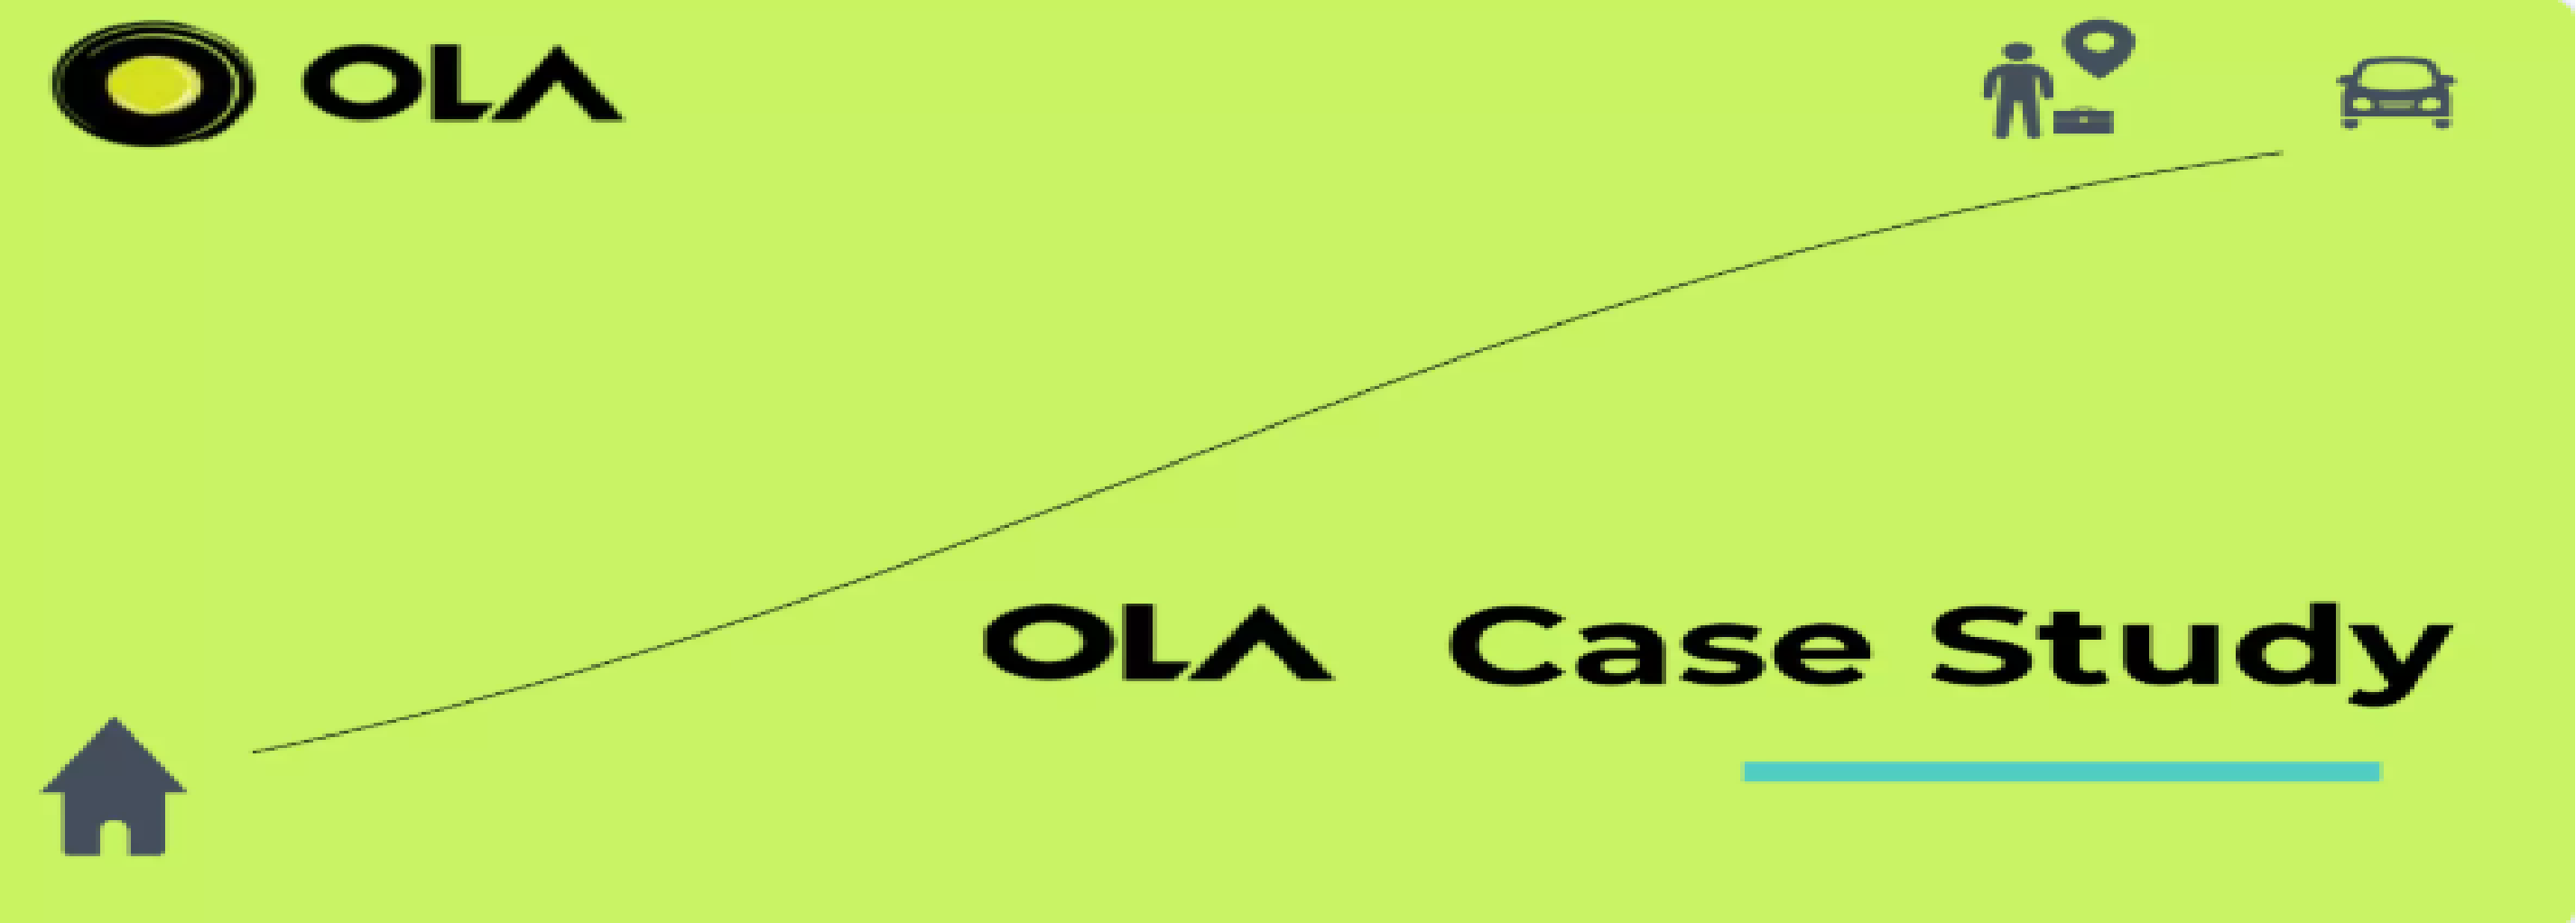

# **Project Name**    -  **Ola Case Study**

##### **Objective**    - The objective of this project is to analyze the factors influencing driver attrition at Ola, utilizing historical data from 2019 and 2020. Through data exploration and visualization, the goal is to identify key patterns, trends, and demographic insights that contribute to driver churn. By understanding these factors, actionable recommendations can be made to enhance driver retention, optimize recruitment strategies, and reduce associated costs, ensuring a sustainable and motivated driver workforce.
##### **Contribution**    - (Manas Nayan Mukherjee) Individual

# **Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

# **Analysis Guide**  

## 1. Define Problem Statement and Perform Exploratory Data Analysis (10 Points)  

- **Definition of Problem:**  
  - Understand the challenge of driver attrition and its impact on Ola.  

- **Data Exploration:**  
  - Check data shape, data types, and convert categorical attributes if necessary.  
  - Detect missing values and prepare for simple imputation.  
  - Perform statistical summary to understand data distribution.  

---

## 2. Data Preprocessing (50 Points)  

- **Simple Imputation:**  
  - Handle missing values using mean, median, or mode for numerical features.  

- **Feature Engineering:**  
  - Create a target variable indicating whether a driver has left the company based on `LastWorkingDate`.  
  - Generate additional features:  
    - Calculate age of each driver based on `Date Of Joining`.  
    - Determine if quarterly rating has increased (`1` if yes, `0` if no).  
    - Identify if monthly income has increased (`1` if yes, `0` if no).  

- **Class Imbalance Treatment:**  
  - Check for class imbalance in the target variable.  
  - Address imbalance using techniques like oversampling, undersampling, or synthetic data generation if necessary.  

---

## **3. Standardization:**  
  - Standardize numerical features to ensure they are on the same scale.  

- **Encoding:**  
  - Perform one-hot encoding for categorical variables like `City`, `Education_Level`, and `Joining Designation`.  

---

## 4. Actionable Insights & Recommendations (10 Points)  

- **Provide actionable insights based on the analysis:**  
  - Identify key factors influencing driver attrition.  
  - Recommend strategies to improve driver retention.  

# **Data Dictionary Overview**

| Feature              | Description                                                                                             |
|----------------------|---------------------------------------------------------------------------------------------------------|
| MMMM-YY              | Reporting Date (Monthly)                                                                                |
| Driver_ID            | Unique ID for drivers                                                                                   |
| Age                  | Age of the driver                                                                                       |
| Gender               | Gender of the driver – Male : 0, Female: 1                                                              |
| City                 | City Code of the driver                                                                                 |
| Education_Level      | Education level – 0 for 10+, 1 for 12+, 2 for graduate                                                  |
| Income               | Monthly average Income of the driver                                                                    |
| Date Of Joining      | Joining date for the driver                                                                             |
| LastWorkingDate      | Last date of working for the driver                                                                     |
| Joining Designation  | Designation of the driver at the time of joining                                                        |
| Grade                | Grade of the driver at the time of reporting                                                            |
| Total Business Value | The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments) |
| Quarterly Rating     | Quarterly rating of the driver: 1, 2, 3, 4, 5 (higher is better)                                        |


# **1. Define Problem Statement and Perform Exploratory Data Analysis**

###***Definition of Problem***

**Solution**

As as a data scientist with the Analytics Department of Ola, focused on driver team attrition, I have been provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

**Impact**

This solution focuses on understanding and reducing driver attrition, which can directly lead to cost savings, improved driver retention, and more stable operations. By addressing the factors contributing to driver churn, Ola can maintain a reliable and satisfied driver base, ensuring consistent service delivery and reducing the financial and operational impact of high turnover. This positions Ola to enhance its reputation as a driver-friendly platform, supporting long-term sustainability.


###***Data Exploration***

###***Import Libraries***

In [70]:
# Here are the list of libraries which are required for our project

# Basic libraries for data manipulation and analysis
import pandas as pd  # Used for handling and processing tabular data like Excel or CSV files
import numpy as np  # Provides support for numerical operations and array manipulations

# Libraries for data visualization
import matplotlib.pyplot as plt  # Creates static and simple visualizations (e.g., line charts, bar plots)
import seaborn as sns  # Offers advanced statistical visualizations with better design aesthetics

# References for visualization libraries:
# Matplotlib: https://matplotlib.org/stable/contents.html
# Seaborn: https://seaborn.pydata.org/

# For handling date and time-related data
from datetime import datetime  # Helps process and manipulate date and time columns in the dataset

# For warning management
import warnings  # Manages unnecessary warning messages during execution
warnings.filterwarnings("ignore")  # Suppresses warnings to keep the output clean

# Let's display a confirmation that all necessary libraries have been successfully imported
print("All necessary libraries have been successfully imported!")

# Libraries for preprocessing (cleaning and transforming data)

# To convert categorical labels (text/string) into numeric values
from sklearn.preprocessing import LabelEncoder
# Example: Converting 'Male' and 'Female' into 0 and 1

# For handling missing values in the dataset
from sklearn.impute import SimpleImputer
# Example: Filling missing values with the column mean, median, or mode

# For standardizing numerical features (scaling the data)
from sklearn.preprocessing import StandardScaler
# Example: Standardizing data so that all features have a mean of 0 and a standard deviation of 1

# To balance imbalanced datasets by reducing the size of the majority class
from sklearn.utils import resample
# Example: Resampling techniques like undersampling to deal with class imbalance issues


All necessary libraries have been successfully imported!


### Dataset Loading

In [71]:
# Load the dataset into a pandas DataFrame
# 'pd.read_csv' is used to read the CSV file from the specified path and load it into a DataFrame named 'Ola'
Ola = pd.read_csv('/content/ola_driver.csv')

# This will allow us to start analyzing and manipulating the data
print("Dataset successfully loaded!")


Dataset successfully loaded!


### Dataset First View

In [72]:
# Let's take a peek at the first few rows of our dataset to see what we're working with
# 'head()' method displays the first 5 rows of the DataFrame by default, giving us a quick overview of the data
Ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


###***Observations***

- The dataset shows driver records with attributes such as Driver_ID, Age, Gender, City, Education_Level, Income, Grade, Total Business Value, and Quarterly Rating.
- Missing values are observed in the LastWorkingDate column for some rows.
Drivers from cities C23 and C7 are present in this sample, with consistent Education_Level values of 2.
- The Total Business Value varies significantly, ranging from a high positive value (₹2,381,060) to a negative value (-₹665,480) in this sample.
- All drivers in this sample have Quarterly Ratings of 1 or 2, and no driver has the highest rating of 4.
---

## **Key Insights**
- Negative Total Business Value indicates financial loss for certain drivers, as seen with Driver_ID 1.
- Cities like C23 and C7 have a mix of both high and low ratings, suggesting diverse performance within cities.
- Drivers with Quarterly Rating of 1 (C7) show no business value, indicating a potential link between low ratings and poor performance.
- The absence of LastWorkingDate for some drivers may suggest active employment, while others with this date might represent churned drivers.
- Drivers from C23 (with higher business value) might contribute more positively to company performance than those from C7.

## Check data shape

In [73]:
# Let's check the shape of our dataset to see how many rows and columns we have
# 'shape' attribute returns a tuple with the number of rows and columns in the DataFrame
Ola.shape

(19104, 14)

- Total rows: 19104
- Total Columns: 14

## Check data types

In [74]:
# Let's examine the data types of each column in our dataset to understand what kind of data we're working with
# 'dtypes' attribute returns the data type of each column in the DataFrame, helping us understand the structure of our dataset
Ola.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


## Observations:
### ***Data Types of Columns***
1. **Numeric Columns:**
   - `Unnamed: 0` (int64): Likely an index column; may not be useful for analysis.
   - `Driver_ID` (int64): Unique identifier for each driver.
   - `Age` (float64): Driver's age, contains missing values.
   - `Gender` (float64): Binary values (0 and 1), contains missing values.
   - `Education_Level` (int64): Categorical representation of education level.
   - `Income` (int64): Monthly income of drivers.
   - `Joining Designation` (int64): Categorical representation of starting designation.
   - `Grade` (int64): Driver grade.
   - `Total Business Value` (int64): Revenue generated by drivers.
   - `Quarterly Rating` (int64): Performance rating of drivers.

2. **Categorical Columns:**
   - `MMM-YY` (object): Likely represents month and year; could be converted to datetime for analysis.
   - `City` (object): Represents the city where drivers operate.

3. **Date Columns:**
   - `Dateofjoining` (object): Driver's joining date; should be converted to datetime for tenure calculations.
   - `LastWorkingDate` (object): Driver's last working date; missing for active drivers.


###***Check duplicate and missing values***

In [75]:
# Let's check for any duplicate rows in our dataset and count them
Ola.duplicated().sum()

# .duplicated() method checks each row in the dataset and identifies whether it is a duplicate of a previous row
# It returns a boolean Series where True indicates a duplicate row
# .sum() function adds up the True values (duplicates), effectively giving the total count of duplicate rows

0

In [76]:
# Let's check for any missing values in our dataset and count them for each column
Ola.isnull().sum()

# .isnull() method detects missing values in each column and returns a DataFrame of the same shape, with True for missing values and False for non-missing values
# .sum() function then adds up the True values (missing values) for each column, effectively giving the total count of missing values per column

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


##  Observations

- We can see that there are lot of missing values (17488) in the dataset for LastWorkingDate
- There are some missing values for Age and Gender

## Let's viualize the missing values

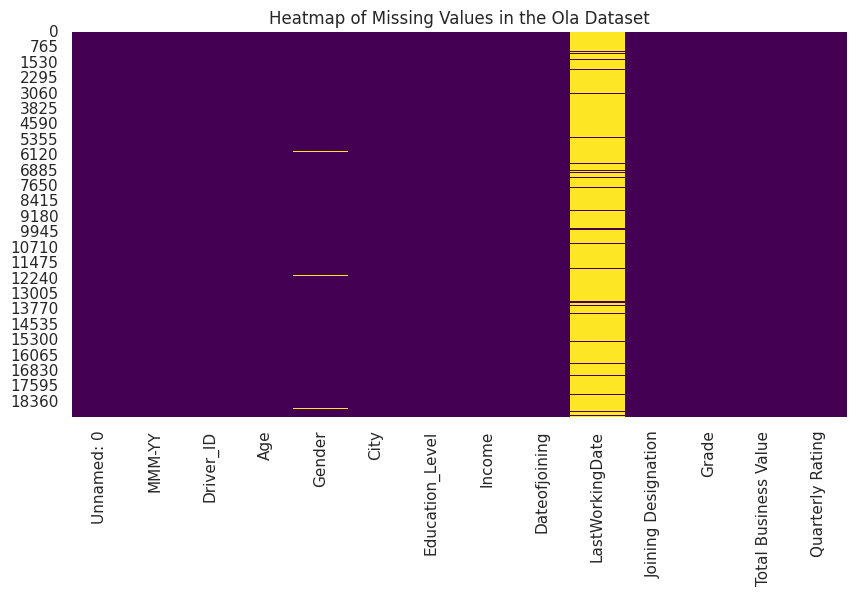

In [77]:
# Visualizing the missing values in the dataset
# This helps us understand the extent and pattern of missing data
plt.figure(figsize=(10,5))  # Set figure size for better readability
sns.heatmap(Ola.isnull(), cbar=False, cmap="viridis")  # Using a colormap for better contrast
plt.title("Heatmap of Missing Values in the Ola Dataset")  # Title for the heatmap
plt.show()  # Display the heatmap
#Here I have used:
# - cbar=False: Removes the color bar to focus on the heatmap itself.
# - cmap="viridis": Uses the 'viridis' colormap for better contrast and visibility.
# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

## What did you know about your dataset?

The dataset provided is sourced from Ola, a leading ride-hailing service company. It focuses on analyzing driver-related information to understand their engagement and predict potential attrition.

Attrition prediction refers to the analytical study of the likelihood that a driver will leave the company or stop working, allowing the company to take proactive measures to retain them before they leave. This analysis aims to provide insights into the drivers' profiles and behaviors that lead to their discontinuation.

The above dataset contains 19,104 rows and 14 columns. It includes information such as driver demographics, income, performance ratings, joining date, and more. There are some missing values in the dataset, particularly for the Age, Gender, and LastWorkingDate columns.

Key Observations:

- The Age and Gender columns have missing values, but the dataset doesn't contain any duplicate rows.
- The LastWorkingDate column is missing for most of the drivers, which could be indicative of their current employment status. This is important for attrition analysis, where LastWorkingDate will be used to determine if a driver has left the company.
- The goal is to analyze these columns and derive insights that help in predicting driver attrition, enabling Ola to strategize retention plans.

## Understanding Variables

In [78]:
# Let's list all the columns in our dataset to see the different features we're working with
Ola.columns

# 'columns' attribute returns an Index object containing the column names of the DataFrame
# This helps us quickly understand the structure of the dataset and the various features available for analysis

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [79]:
# Checking numerical columns in the Ola dataset to identify which columns contain numerical data
# 'numerical_columns' will store the names of columns with data types 'int64' and 'float64'
numerical_columns = Ola.select_dtypes(include=['int64', 'float64']).columns

# Printing out the numerical columns so we can see which ones they are
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')


In [80]:
# Let's get a summary of the statistics for our numerical columns in the dataset
Ola.describe()

# 'describe()' method provides a statistical summary of the numerical columns in the DataFrame
# This summary includes count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) values

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


###***Great!! got the description, now I will extract important details and do some calculations here***

In [81]:
# Gender Distribution
print("# GENDER DISTRIBUTION\n")

# Calculate the counts of male and female drivers
# gender_count stores the overall counts for each gender (0 for male, 1 for female)
# male_drivers counts the number of male drivers
# female_drivers counts the number of female drivers
gender_count = Ola['Gender'].value_counts()
male_drivers = Ola[Ola['Gender'] == 0].shape[0]
female_drivers = Ola[Ola['Gender'] == 1].shape[0]

# Display the gender counts to understand the distribution of male and female drivers
print("Gender Count:\n", gender_count)
print(f"Number of Male Drivers: {male_drivers}")
print(f"Number of Female Drivers: {female_drivers}\n")

# Explanation:
# - gender_count: Uses value_counts() to get the number of male (0) and female (1) drivers.
# - male_drivers and female_drivers: Count the specific number of male and female drivers using conditional filtering.
# - This helps us understand the gender distribution among drivers.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

# Age Statistics
print("# AGE STATISTICS\n")

# Calculate and display descriptive statistics for the Age column
# This helps us understand the distribution of driver ages
age_stats = Ola['Age'].describe()
print("Age Statistics:")
print(age_stats)
print("\n")

# Explanation:
# - age_stats: Uses describe() to provide a summary of statistics for the Age column, including count, mean, standard deviation, min, and max values, as well as the 25th, 50th, and 75th percentiles.
# - This helps us understand the age distribution of drivers.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

# Education Level Distribution
print("# EDUCATION LEVEL DISTRIBUTION\n")

# Calculate and display the count of drivers at each education level
# education_level_count stores the counts for different education levels
education_level_count = Ola['Education_Level'].value_counts()
print("Education Level Count:")
print(education_level_count)
print("\n")

# Explanation:
# - education_level_count: Uses value_counts() to calculate the number of drivers at each education level.
# - This helps us understand the educational background distribution among drivers.

# Income Statistics
print("# INCOME STATISTICS\n")

# Calculate and display descriptive statistics for the Income column
# This provides insights into the income distribution among drivers
income_stats = Ola['Income'].describe()
print("Income Statistics:")
print(income_stats)
print("\n")

# Explanation:
# - income_stats: Uses describe() to provide a summary of statistics for the Income column, similar to the Age statistics.
# - This helps us understand the income distribution among drivers.


# Joining Designation Distribution
print("# JOINING DESIGNATION DISTRIBUTION\n")

# Calculate and display the count of drivers at each joining designation
# joining_designation_count stores the counts for different joining designations
joining_designation_count = Ola['Joining Designation'].value_counts()
print("Joining Designation Count:")
print(joining_designation_count)
print("\n")

# Explanation:
# - joining_designation_count: Uses value_counts() to calculate the number of drivers at each joining designation.
# - This helps us understand the different designations drivers held when joining the company.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

# Grade Distribution
print("# GRADE DISTRIBUTION\n")

# Calculate and display the count of drivers at each grade
# grade_count stores the counts for different grades
grade_count = Ola['Grade'].value_counts()
print("Grade Count:")
print(grade_count)
print("\n")

# Explanation:
# - grade_count: Uses value_counts() to calculate the number of drivers at each grade.
# - This helps us understand the distribution of drivers across different grades.

# Total Business Value Statistics
print("# TOTAL BUSINESS VALUE STATISTICS\n")

# Calculate and display descriptive statistics for the Total Business Value column
# This helps us understand the distribution of total business value generated by drivers
total_business_value_stats = Ola['Total Business Value'].describe()
print("Total Business Value Statistics:")
print(total_business_value_stats)
print("\n")

# Explanation:
# - total_business_value_stats: Uses describe() to provide a summary of statistics for the Total Business Value column.
# - This helps us understand the total business value generated by drivers.

# Quarterly Rating Distribution
print("# QUARTERLY RATING DISTRIBUTION\n")

# Calculate and display the count of drivers in each Quarterly Rating
# quarterly_rating_count stores the counts for different quarterly ratings
quarterly_rating_count = Ola['Quarterly Rating'].value_counts()
print("Quarterly Rating Count:")
print(quarterly_rating_count)
print("\n")

# Explanation:
# - quarterly_rating_count: Uses value_counts() to calculate the number of drivers in each Quarterly Rating.
# - This helps us understand the distribution of drivers' quarterly ratings.


# GENDER DISTRIBUTION

Gender Count:
 Gender
0.0    11074
1.0     7978
Name: count, dtype: int64
Number of Male Drivers: 11074
Number of Female Drivers: 7978

# AGE STATISTICS

Age Statistics:
count    19043.000000
mean        34.668435
std          6.257912
min         21.000000
25%         30.000000
50%         34.000000
75%         39.000000
max         58.000000
Name: Age, dtype: float64


# EDUCATION LEVEL DISTRIBUTION

Education Level Count:
Education_Level
1    6864
2    6327
0    5913
Name: count, dtype: int64


# INCOME STATISTICS

Income Statistics:
count     19104.000000
mean      65652.025126
std       30914.515344
min       10747.000000
25%       42383.000000
50%       60087.000000
75%       83969.000000
max      188418.000000
Name: Income, dtype: float64


# JOINING DESIGNATION DISTRIBUTION

Joining Designation Count:
Joining Designation
1    9831
2    5955
3    2847
4     341
5     130
Name: count, dtype: int64


# GRADE DISTRIBUTION

Grade Count:
Grade
2    6627
1    52

## Let's visualize it to understand it better

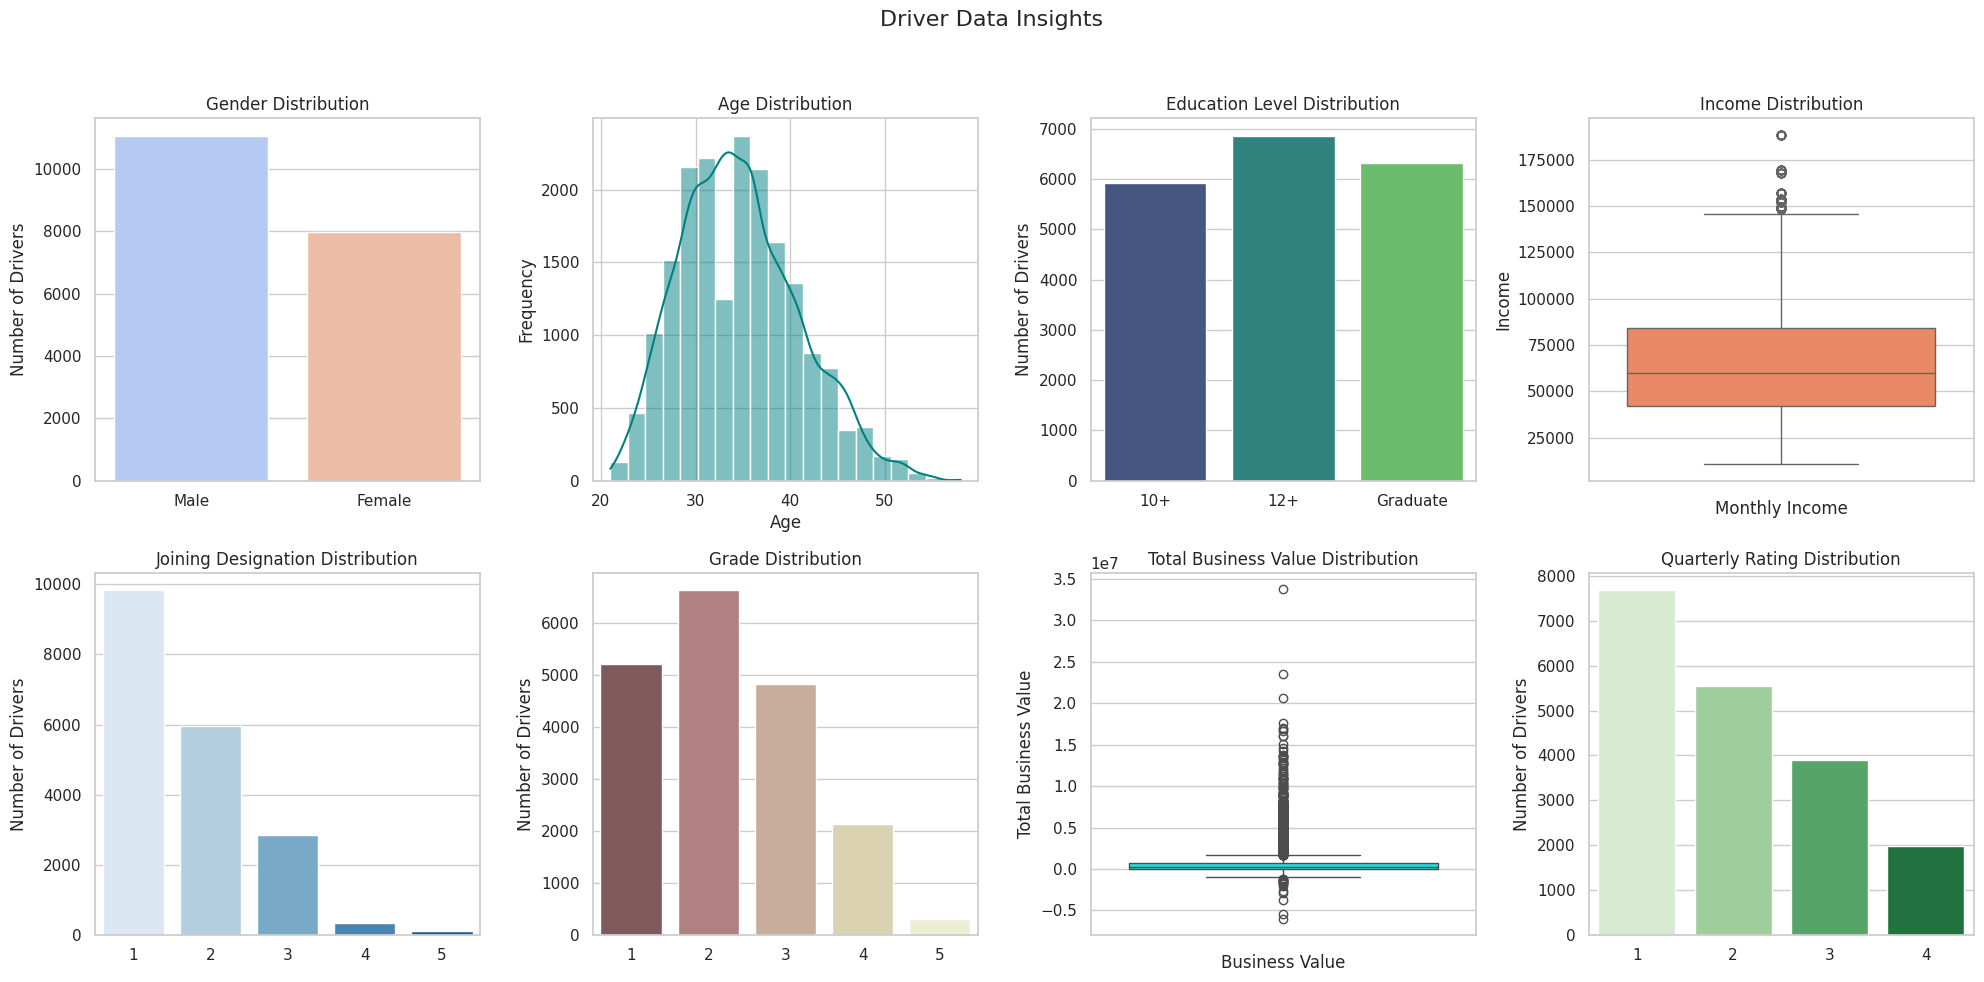

In [82]:
# Reference for visualizations: https://seaborn.pydata.org/examples/index.html
# Set the figure size for a 2x4 grid layout to organize our visualizations
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Driver Data Insights", fontsize=16)

# Plot 1: Gender Distribution
# Create a bar plot showing the number of male and female drivers
sns.barplot(x=["Male", "Female"], y=[11074, 7978], ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Gender Distribution")
axes[0, 0].set_ylabel("Number of Drivers")

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the number of male and female drivers.
# - x and y: Define the categories (Male, Female) and their respective counts.
# - palette: Sets the color palette for the plot.


# Plot 2: Age Distribution
# Create a histogram to show the distribution of driver ages
sns.histplot(Ola['Age'], kde=True, bins=20, ax=axes[0, 1], color="teal")
axes[0, 1].set_title("Age Distribution")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Frequency")

# Explanation:
# - sns.histplot: Creates a histogram to visualize the distribution of driver ages.
# - kde: Adds a kernel density estimate line to the histogram.
# - bins: Specifies the number of bins for the histogram.


# Plot 3: Education Level Distribution
# Create a bar plot showing the number of drivers at different education levels
sns.barplot(x=["10+", "12+", "Graduate"], y=[5913, 6864, 6327], ax=axes[0, 2], palette="viridis")
axes[0, 2].set_title("Education Level Distribution")
axes[0, 2].set_ylabel("Number of Drivers")

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the number of drivers at different education levels.
# - x and y: Define the categories (education levels) and their respective counts.
# - palette: Sets the color palette for the plot.


# Plot 4: Income Distribution
# Create a box plot to show the distribution of driver incomes
sns.boxplot(Ola['Income'], ax=axes[0, 3], color="coral")
axes[0, 3].set_title("Income Distribution")
axes[0, 3].set_xlabel("Monthly Income")

# Explanation:
# - sns.boxplot: Creates a box plot to visualize the distribution of driver incomes.
# - color: Sets the color for the box plot.


# Plot 5: Joining Designation Distribution
# Create a bar plot showing the number of drivers at different joining designations
sns.barplot(x=["1", "2", "3", "4", "5"], y=[9831, 5955, 2847, 341, 130], ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title("Joining Designation Distribution")
axes[1, 0].set_ylabel("Number of Drivers")

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the number of drivers at different joining designations.
# - x and y: Define the categories (designations) and their respective counts.


# Plot 6: Grade Distribution
# Create a bar plot showing the number of drivers at different grades
sns.barplot(x=["1", "2", "3", "4", "5"], y=[5202, 6627, 4826, 2144, 305], ax=axes[1, 1], palette="pink")
axes[1, 1].set_title("Grade Distribution")
axes[1, 1].set_ylabel("Number of Drivers")

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the number of drivers at different grades.


# Plot 7: Total Business Value Distribution
# Create a box plot to show the distribution of total business value generated by drivers
sns.boxplot(Ola['Total Business Value'], ax=axes[1, 2], color="cyan")
axes[1, 2].set_title("Total Business Value Distribution")
axes[1, 2].set_xlabel("Business Value")

# Explanation:
# - sns.boxplot: Creates a box plot to visualize the distribution of total business value generated by drivers.


# Plot 8: Quarterly Rating Distribution
# Create a bar plot showing the number of drivers at different quarterly ratings
sns.barplot(x=["1", "2", "3", "4"], y=[7679, 5553, 3895, 1977], ax=axes[1, 3], palette="Greens")
axes[1, 3].set_title("Quarterly Rating Distribution")
axes[1, 3].set_ylabel("Number of Drivers")

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the number of drivers at different quarterly ratings.


# Adjust spacing between subplots for better readability
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

# Explanation:
# - fig.suptitle: Adds a main title to the entire figure.
# - plt.tight_layout: Adjusts the spacing between subplots to prevent overlap and ensures better readability.


###***Key findings***:

1. Gender Distribution:- There are more male drivers (11,074) than female drivers (7,978).

2. Age Distribution:- The average age of drivers is around 34 years.
Most drivers fall between the age group of 30–40 years.

3. Education Level Distribution:- Drivers with an education level of 12+ (6,864) and Graduate (6,327) dominate the group. Drivers with 10+ education are slightly fewer (5,913).

4. Income Distribution:- The average monthly income is around ₹65,652, with most drivers earning between ₹42,000 and ₹84,000. There are outliers with very high income values.

5. Joining Designation Distribution:- Most drivers joined under Designation 1 (9,831), followed by Designation 2 (5,955).

6. Grade Distribution:- Most drivers fall into Grade 2 (6,627) and Grade 1 (5,202).Higher grades like Grade 4 and Grade 5 have fewer drivers.

7. Total Business Value Distribution:- The average business value is around ₹5.7 lakhs, but there are significant outliers both on the negative and positive ends. 25% of drivers contribute little or no business value.

8. Quarterly Rating Distribution:- Rating 1 is the most common, followed by Ratings 2 and 3. Few drivers received Ratings 4 and above.



###***Final Conclusion***

- The driver workforce is male-dominated, with most drivers in their 30s and having higher educational qualifications.
- Income and business value distributions show skewness due to outliers, indicating disparities among drivers.
- There is potential to improve performance ratings and career progression (Grade distribution) for a significant portion of the drivers.



###***I will now check the trends in monthly income or business value acquired by drivers this will help to improve driver retention, optimize business performance and Identify seasonal or operational trends impacting income and business value***

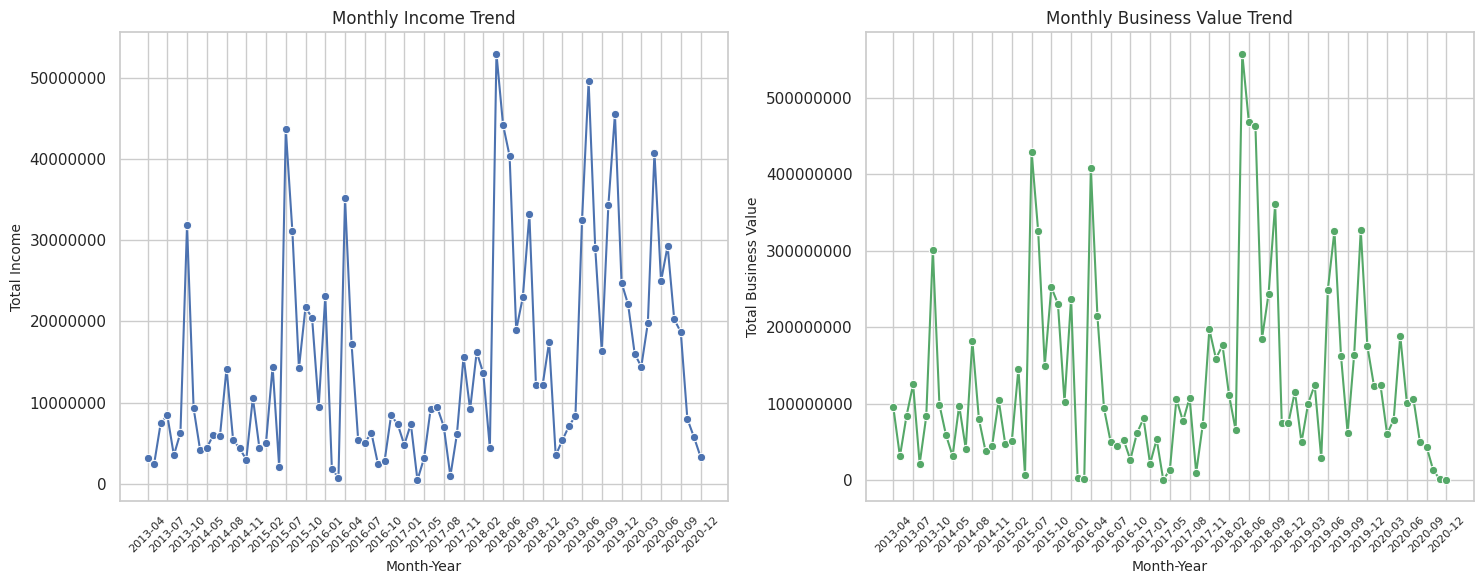

In [83]:
# Group data by Month and calculate the sum of Income and Business Value for each month
# Convert the 'Dateofjoining' column to datetime format for easier manipulation
Ola['Dateofjoining'] = pd.to_datetime(Ola['Dateofjoining'])
# Extract month-year from the joining date and store it in a new 'Month' column
Ola['Month'] = Ola['Dateofjoining'].dt.to_period('M')

# Explanation:
# - pd.to_datetime: Converts the 'Dateofjoining' column to a datetime format to enable date-based operations.
# - .dt.to_period('M'): Extracts the month and year from the 'Dateofjoining' date and stores it in a new 'Month' column.

# References:
# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html

# Calculate the monthly trends for Income and Total Business Value
# Group the data by 'Month' and sum the 'Income' and 'Total Business Value' for each month
monthly_trends = Ola.groupby('Month')[['Income', 'Total Business Value']].sum().reset_index()
# Convert the 'Month' period to a string format for easier plotting
monthly_trends['Month'] = monthly_trends['Month'].astype(str)

# Explanation:
# - groupby('Month'): Groups the data by the 'Month' column.
# - .sum(): Calculates the sum of 'Income' and 'Total Business Value' for each month.
# - .reset_index(): Resets the index of the resulting DataFrame for easier manipulation.
# - .astype(str): Converts the 'Month' period to string format for plotting.

# Plotting the trends
# Create a figure with 2 subplots side-by-side, setting the figure size to 15x6 inches
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Explanation:
# - plt.subplots: Creates a figure with a 1x2 grid layout for subplots.
# - figsize: Sets the size of the figure to 15 inches wide and 6 inches tall.

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Lineplot for Monthly Income Trend
# Plot the monthly total income as a line plot with markers
sns.lineplot(data=monthly_trends, x='Month', y='Income', ax=ax[0], marker='o', color='b')
# Set the title and labels for the plot
ax[0].set_title("Monthly Income Trend", fontsize=12)
ax[0].set_xlabel("Month-Year", fontsize=10)
ax[0].set_ylabel("Total Income", fontsize=10)
# Rotate x-axis labels for better readability and set their size
ax[0].tick_params(axis='x', rotation=45, labelsize=8)
# Remove scientific notation from the y-axis
ax[0].ticklabel_format(style='plain', axis='y')

# Explanation:
# - sns.lineplot: Creates a line plot to visualize monthly total income trends.
# - marker='o': Adds markers to the data points on the line plot.
# - set_title, set_xlabel, set_ylabel: Adds a title and labels to the plot.
# - tick_params: Adjusts the properties of the x-axis ticks (rotation and label size).
# - ticklabel_format: Removes scientific notation from the y-axis labels.


# Reference: https://seaborn.pydata.org/generated/seaborn.lineplot.html

# Lineplot for Monthly Business Value Trend
# Plot the monthly total business value as a line plot with markers
sns.lineplot(data=monthly_trends, x='Month', y='Total Business Value', ax=ax[1], marker='o', color='g')
# Set the title and labels for the plot
ax[1].set_title("Monthly Business Value Trend", fontsize=12)
ax[1].set_xlabel("Month-Year", fontsize=10)
ax[1].set_ylabel("Total Business Value", fontsize=10)
# Rotate x-axis labels for better readability and set their size
ax[1].tick_params(axis='x', rotation=45, labelsize=8)
# Remove scientific notation from the y-axis
ax[1].ticklabel_format(style='plain', axis='y')

# Adjust the number of x-axis ticks to avoid clutter
# Show every 3rd month for better clarity
xticks = monthly_trends['Month'][::3]
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)

# Explanation:
# - set_xticks: Sets the x-axis ticks to show every 3rd month for better clarity.

# Reference: https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes.set_xticks

# Make the layout tight and clean
plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()  # Display the plots


###Observations

- Seasonal Spikes: Both monthly income and total business value tend to spike around the beginning of each year. This pattern is consistent and noticeable across multiple years.
- Fluctuations: There are significant fluctuations in both income and business value, indicating periods of high activity followed by sharp declines. This suggests variability in monthly performance.
- Correlation: The spikes in income and business value often occur simultaneously, suggesting a possible correlation between the two metrics.

###***Correlation Between Age and Income***



Correlation between Age and Income: 0.19


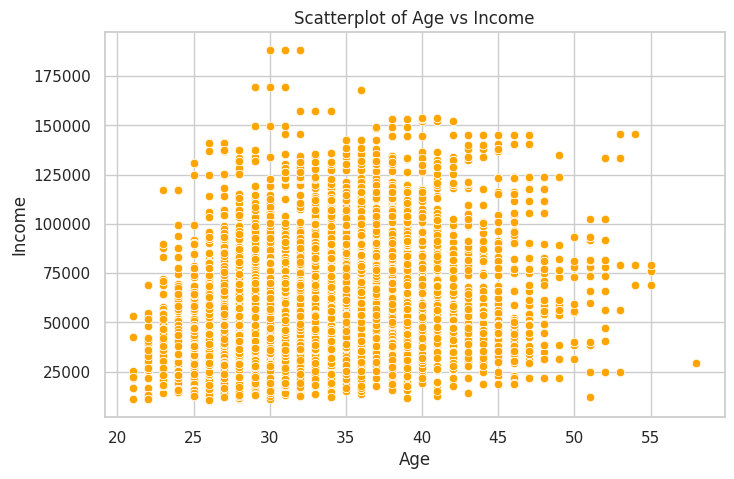

In [84]:
# Check for correlation between Age and Income to see if there's a relationship between these variables
# 'correlation' will store the Pearson correlation coefficient between Age and Income
correlation = Ola['Age'].corr(Ola['Income'])
print(f"Correlation between Age and Income: {correlation:.2f}")

# Explanation:
# - .corr(): This method calculates the Pearson correlation coefficient between two columns.
# - Pearson correlation coefficient measures the linear relationship between two variables.
# - A value close to 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.
# - Here, we compute the correlation between 'Age' and 'Income'.

# Create a scatterplot for visualizing the relationship between Age and Income
# This plot helps us see how Age and Income are related
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Ola, x='Age', y='Income', color='orange')
plt.title("Scatterplot of Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# Explanation:
# - plt.figure(figsize=(8, 5)): Sets the size of the figure to 8 inches wide and 5 inches tall for better readability.
# - sns.scatterplot: Creates a scatterplot to visualize the relationship between 'Age' and 'Income'.
# - data=Ola: Specifies the DataFrame containing the data.
# - x='Age', y='Income': Defines the columns to be plotted on the x and y axes.
# - color='orange': Sets the color of the scatterplot points.

# Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

###Observations

- We can see that income generally increases with age up to around 40 years, indicating that drivers tend to earn more as they gain experience.
- After the age of 40, the income levels slightly decreased, suggesting that factors other than age, such as health or shifts in job roles, may affect income at this stage.
- The data points for income are spread widely, ranging from 0 to 175,000, highlighting a significant variation in earnings among drivers of the same age group. This could be due to differences in performance, location, or other personal factors

###***Let's check how Education_Level and City Affect Total Business Value***

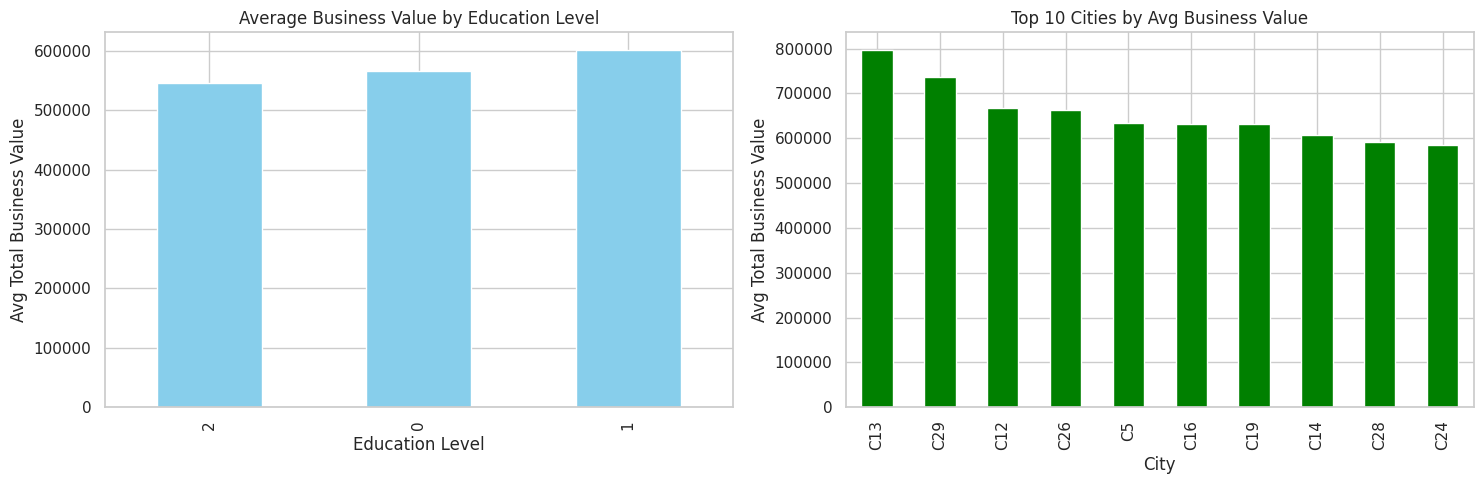

In [85]:
# Group the data by Education_Level and calculate the mean Total Business Value for each group
# 'education_business_value' will store the average Total Business Value for each education level
education_business_value = Ola.groupby('Education_Level')['Total Business Value'].mean().sort_values()

# Explanation:
# - groupby('Education_Level'): Groups the data by the 'Education_Level' column.
# - .mean(): Calculates the mean (average) Total Business Value for each education level.
# - .sort_values(): Sorts the resulting averages in ascending order.


# Group the data by City and calculate the mean Total Business Value, then get the top 10 cities
# 'city_business_value' will store the average Total Business Value for the top 10 cities
city_business_value = Ola.groupby('City')['Total Business Value'].mean().sort_values(ascending=False).head(10)


# Plot the results
# Create a figure with 2 subplots side-by-side, setting the figure size to 15x5 inches
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# Plot 1: Average Business Value by Education Level
# Plot the average Total Business Value for each education level as a bar plot
education_business_value.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title("Average Business Value by Education Level")
ax[0].set_xlabel("Education Level")
ax[0].set_ylabel("Avg Total Business Value")


# Plot 2: Top 10 Cities by Average Business Value
# Plot the average Total Business Value for the top 10 cities as a bar plot
city_business_value.plot(kind='bar', color='green', ax=ax[1])
ax[1].set_title("Top 10 Cities by Avg Business Value")
ax[1].set_xlabel("City")
ax[1].set_ylabel("Avg Total Business Value")


# Adjust the layout to make everything fit nicely
plt.tight_layout()
plt.show()


# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html


###Observations

- Drivers with different levels of education—whether they've completed 10 years, 12 years, or graduated—have similar total business values on average. However, graduates tend to have a slightly higher average business value.

- The total business value varies quite a lot between different cities. For instance, drivers in City C13 tend to have the highest average business value, whereas those in City C24 have the lowest among the top 10 cities.

- Overall, education level has a small impact on business value, but the city where a driver works has a much bigger impact. This means location is more important than education level in determining how much business a driver can generate.

# **2. Data Preprocessing**

- What is it: Data preprocessing involves cleaning and transforming raw data to remove unwanted or irrelevant information. This process enhances the quality of the dataset, making it more valuable for data manipulation and analysis in later stages of data mining. Proper data preprocessing ensures that the dataset is ready for accurate and efficient analysis.

For more detailed information please visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?form=MG0AV3

## ***Handle missing values using mean, median, or mode for numerical features***

We will handle the missing values by imputing them using mean, median, or mode for the respective columns. For Age and Income, we'll use median because these are numerical features with likely skewed distributions. For categorical features like Gender, we'll use mode (most frequent value).

In [86]:
# Imputation for missing values in the dataset

# Fill missing values in the 'Age' column with the median age to ensure no data gaps
# This step helps maintain the integrity of our data analysis by replacing missing values with the median age
Ola['Age'].fillna(Ola['Age'].median(), inplace=True)

# Explanation:
# - .fillna(Ola['Age'].median()): Fills missing values in the 'Age' column with the median age.
# - inplace=True: Applies the changes directly to the original DataFrame, without creating a new one.
# - This approach ensures that we do not have gaps in our data due to missing values, and the median is a robust measure that is less affected by outliers compared to the mean.


In [87]:
# Impute missing values in the 'Gender' column using the mode (most frequent value) to ensure no data gaps
# This step replaces any missing values in the 'Gender' column with the most frequently occurring value
# Ensuring consistency and completeness in the dataset
Ola['Gender'].fillna(Ola['Gender'].mode()[0], inplace=True)

# Explanation:
# - .fillna(Ola['Gender'].mode()[0]): Fills missing values in the 'Gender' column with the mode (most frequent value).
# - mode()[0]: Computes the mode of the 'Gender' column and selects the first mode value. The mode is the value that appears most frequently in a dataset.
# - inplace=True: Applies the changes directly to the original DataFrame, without creating a new one.
# - This approach ensures consistency and completeness in the dataset by replacing missing values with the most common gender value.


In [88]:
# Impute missing values in the 'Income' column using the median to ensure no data gaps
# This step replaces any missing values in the 'Income' column with the median value
# Ensuring consistency and completeness in the dataset
Ola['Income'].fillna(Ola['Income'].median(), inplace=True)

# Explanation:
# - .fillna(Ola['Income'].median()): Fills missing values in the 'Income' column with the median value.
# - median(): Computes the median of the 'Income' column. The median is the middle value in a sorted list of numbers, making it a robust measure that is less affected by outliers compared to the mean.
# - inplace=True: Applies the changes directly to the original DataFrame, without creating a new one.
# - This approach ensures that we do not have gaps in our data due to missing values, and using the median helps maintain data integrity.


In [89]:
# Dropping the unnecessary "Unnamed: 0" column to clean up our dataset
# This step removes the "Unnamed: 0" column, which is likely an index column added during data import
Ola = Ola.drop(columns=['Unnamed: 0'])

# Explanation:
# - .drop(columns=['Unnamed: 0']): Removes the specified column from the DataFrame.
# - 'Unnamed: 0': This column is often an extra index column added during data import and is typically unnecessary for analysis.
# - Dropping this column helps in cleaning up the dataset and making it more manageable.


In [90]:
# Impute missing values in the 'LastWorkingDate' column using the mode (most frequent value)
# This step fills in missing values in the 'LastWorkingDate' column with the most common date
# Assumes that drivers without a 'Last Working Date' haven't left their job
Ola['LastWorkingDate'].fillna(Ola['LastWorkingDate'].mode()[0], inplace=True)

# Explanation:
# - .fillna(Ola['LastWorkingDate'].mode()[0]): Fills missing values in the 'LastWorkingDate' column with the mode (most frequent value).
# - mode()[0]: Computes the mode of the 'LastWorkingDate' column and selects the first mode value. The mode is the value that appears most frequently in a dataset.
# - inplace=True: Applies the changes directly to the original DataFrame, without creating a new one.
# - This approach ensures consistency and completeness in the dataset by replacing missing values with the most common last working date, which assumes that drivers without a 'Last Working Date' haven't left their job.


In [91]:
# Verify if all missing values have been handled correctly
# 'missing_values_count' will store the count of missing values for each column in the dataset
missing_values_count = Ola.isnull().sum()
# Print the count of missing values for each column to ensure all gaps have been filled
print(missing_values_count)


# Confirm that the dataset has no missing values and is ready for further preprocessing
print('The dataset has no missing values, ensuring it is ready for further preprocessing steps')

# Explanation:
# - The print statement confirms that all missing values have been handled and the dataset is ready for the next steps in the preprocessing workflow.
# - This is an essential step to ensure data integrity before proceeding with any analysis or modeling tasks.

MMM-YY                  0
Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Dateofjoining           0
LastWorkingDate         0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
Month                   0
dtype: int64
The dataset has no missing values, ensuring it is ready for further preprocessing steps


## Explanation:
- Unnamed: 0, MMM-YY, Driver_ID, City, Joining Designation, Grade, Total Business Value, Quarterly Rating, etc.: These columns have no missing values (count = 0), meaning every row in the dataset has a valid entry for these columns.

- Age, Gender, Income, Dateofjoining, LastWorkingDate, and others: These columns also show zero missing values, indicating that all data for these columns is intact, and no NaN values are present.

Since there are no missing values in the dataset Imputation is not required.

## ***Feature Engineering***

What is it: Feature engineering is a preprocessing step in supervised machine learning and statistical modeling that transforms raw data into a more effective set of inputs. Each input comprises several attributes, known as features. By providing models with relevant information, feature engineering significantly enhances their predictive accuracy and decision-making capability.

For more information please visit https://scikit-learn.org/stable/modules/compose.html?form=MG0AV3#feature-engineering

### I have categorised this section in 4 parts and mentioned the details of each part separately


- Create a target variable indicating whether a driver has left the company based on LastWorkingDate.

I have created a new column Attrition, where 1 indicates the driver has left the company (if LastWorkingDate is not null) and 0 indicates the driver is still employed.

- a) Target Variable for Attrition (Driver Left)

In [92]:
# Create a target variable 'Attrition' to indicate if a driver has left the company (1) or is still employed (0)
# This step creates a new column 'Attrition' where a value of 1 indicates the driver has left (LastWorkingDate is not null)
# and a value of 0 indicates the driver is still employed (LastWorkingDate is null)
Ola['Attrition'] = Ola['LastWorkingDate'].notnull().astype(int)

# Explanation:
# - .notnull(): Checks each value in the 'LastWorkingDate' column to see if it is not null (not missing).
# - .astype(int): Converts the boolean values (True for not null, False for null) into integers (1 for True, 0 for False).
# - This creates a new column 'Attrition' where 1 indicates the driver has left (LastWorkingDate is present) and 0 indicates the driver is still employed (LastWorkingDate is absent).

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notnull.html

### Generate additional features

- Calculate Tenure of each driver based on Date Of Joining

I have calculated the tenure of each driver as the difference between the current date and the Dateofjoining column.

- b) Tenure Feature

In [93]:
# Convert 'Dateofjoining' to datetime format, handling any errors
# This ensures 'Dateofjoining' is in a standard datetime format, making it easier to work with
Ola['Dateofjoining'] = pd.to_datetime(Ola['Dateofjoining'], errors='coerce')

# Explanation:
# - pd.to_datetime(Ola['Dateofjoining'], errors='coerce'): Converts the 'Dateofjoining' column to datetime format.
# - errors='coerce': Any invalid parsing will be set as NaT (Not a Time) to handle errors gracefully.
# - Ensuring 'Dateofjoining' is in a standard datetime format makes it easier to manipulate and analyze date-based data.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

# Calculate tenure as the difference between the current date and 'Dateofjoining' in months
# 'Tenure' is computed as the number of months from 'Dateofjoining' to the current date
Ola['Tenure'] = (pd.to_datetime('today') - Ola['Dateofjoining']).dt.days // 30  # in months

# Explanation:
# - pd.to_datetime('today'): Gets the current date in datetime format.
# - (pd.to_datetime('today') - Ola['Dateofjoining']): Calculates the difference between the current date and 'Dateofjoining'.
# - .dt.days: Converts the difference to the number of days.
# - // 30: Converts the number of days to months by integer division.
# - This calculates the tenure of each driver in months, which is useful for analysis related to experience and retention.

- Determine if quarterly rating has increased (1 if yes, 0 if no)

- c) Quarterly Rating Change

I have created a binary feature QuarterlyRatingChanged, where 1 indicates an increase in the quarterly rating compared to the previous quarter.

In [94]:
# Create a new column 'QuarterlyRatingChanged' to capture if the quarterly rating has improved
# This step creates a new column where a value of 1 indicates an improvement in the quarterly rating compared to the previous rating
# Shift the 'Quarterly Rating' column by one row to compare the current rating with the previous one
# If the current rating is greater than the previous one, the new column will have a value of 1 (indicating improvement), otherwise 0
Ola['QuarterlyRatingChanged'] = (Ola['Quarterly Rating'] > Ola['Quarterly Rating'].shift(1)).astype(int)

# Explanation:
# - .shift(1): Shifts the 'Quarterly Rating' column by one row, allowing comparison with the previous rating.
# - (Ola['Quarterly Rating'] > Ola['Quarterly Rating'].shift(1)): Creates a boolean series where True indicates an improvement in the quarterly rating.
# - .astype(int): Converts the boolean values (True for improvement, False for no improvement) into integers (1 for improvement, 0 for no improvement).
# - This approach captures whether the quarterly rating has improved over time, providing valuable insights into performance trends.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html

- Identify if monthly income has increased (1 if yes, 0 if no)

d) Monthly Income Change

I have created a binary feature IncomeIncreased, where 1 indicates an increase in income compared to the previous month.

In [95]:
# Create a new column 'IncomeIncreased' to indicate if income has increased from the previous month
# This step creates a new column where a value of 1 indicates an increase in income compared to the previous month
# Shift the 'Income' column by one row to compare the current month's income with the previous month's income
# If the current month's income is greater than the previous month's, the new column will have a value of 1 (indicating an increase), otherwise 0
Ola['IncomeIncreased'] = (Ola['Income'] > Ola['Income'].shift(1)).astype(int)

# Explanation:
# - .shift(1): Shifts the 'Income' column by one row, allowing comparison with the previous month's income.
# - (Ola['Income'] > Ola['Income'].shift(1)): Creates a boolean series where True indicates an increase in income.
# - .astype(int): Converts the boolean values (True for increase, False for no increase) into integers (1 for increase, 0 for no increase).
# - This approach captures whether the income has increased month-over-month, providing insights into income growth trends.

- Verify the changes

In [96]:
# Verify the changes we have made by printing the first few rows of key columns
# This step prints the first few rows of the specified columns to check that the new columns were created correctly
print(Ola[['Attrition', 'Tenure', 'QuarterlyRatingChanged', 'IncomeIncreased']].head())

# Explanation:
# - print(Ola[['Attrition', 'Tenure', 'QuarterlyRatingChanged', 'IncomeIncreased']].head()): Prints the first five rows of the specified columns to verify that the new columns ('Attrition', 'Tenure', 'QuarterlyRatingChanged', and 'IncomeIncreased') have been created and populated correctly.
# - .head(): Returns the first five rows of the DataFrame by default, which is useful for quickly inspecting the contents of the specified columns.

   Attrition  Tenure  QuarterlyRatingChanged  IncomeIncreased
0          1      72                       0                0
1          1      72                       0                0
2          1      72                       0                0
3          1      50                       0                1
4          1      50                       0                0


### From the above dataframe we can now see that our feature engineering is successfully and we have created 4 new additional features

- Attrition(Driver_Left): Indicates churn status.
- Tenure: Tenure of drivers in years.
- Quarterly_Rating_Increased: Tracks rating progression.
- Income_Increased: Tracks income progression.

### Let's breakdown each coloumn output

- Attrition: All the drivers in the sample dataset have left the company (Attrition = 1).
- Tenure: Driver_ID 1 has been with the company for 72 months, whereas Driver_ID 2 has been with the company for 49 months. This indicates a longer tenure for Driver_ID 1.
- Quarterly Rating Change: There was no increase in the quarterly rating for the drivers (QuarterlyRatingChanged = 0 for all records).
- Income Change: Driver_ID 2 experienced an income increase at row 3, while Driver_ID 1 had no changes in income over time (IncomeIncreased = 0 for all rows).

####***These newly engineered features will help in analyzing factors affecting driver retention and make predictions about driver churn. I have visualized these newly feature engineered columns***

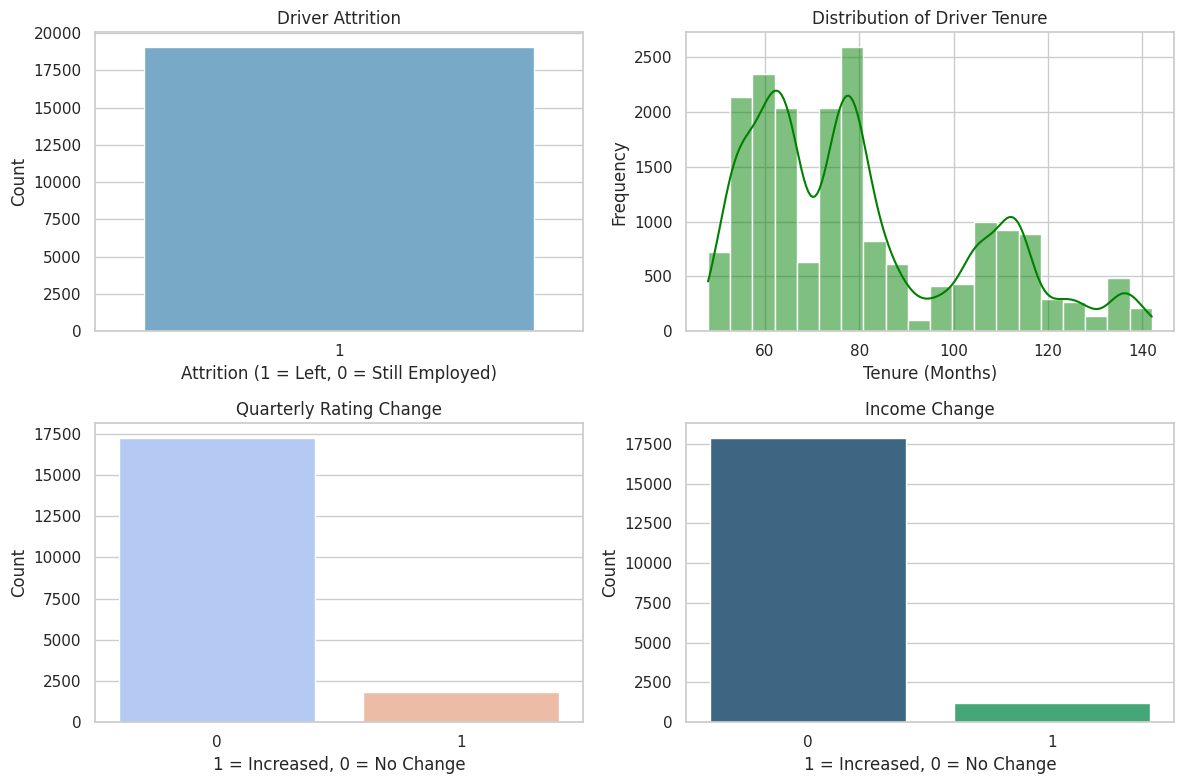

In [97]:
# Set up the figure and axes for subplots to organize our visualizations
# Here, we're creating a figure with 2 rows and 2 columns of subplots, and setting the size to 12x8 inches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Explanation:
# - plt.subplots(2, 2): Creates a figure with a 2x2 grid layout for subplots.
# - figsize=(12, 8): Sets the size of the figure to 12 inches wide and 8 inches tall for better readability.

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Visualization for Driver Attrition
# Using the 'Blues' palette for a cleaner look
sns.countplot(data=Ola, x='Attrition', palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Driver Attrition')  # Set the title of the plot
axes[0, 0].set_xlabel('Attrition (1 = Left, 0 = Still Employed)')  # Label for the x-axis
axes[0, 0].set_ylabel('Count')  # Label for the y-axis

# Explanation:
# - sns.countplot: Creates a count plot to visualize the frequency distribution of the 'Attrition' column.
# - palette='Blues': Sets the color palette to 'Blues' for a cleaner look.
# - set_title, set_xlabel, set_ylabel: Adds a title and labels to the plot.


# Visualization for Distribution of Driver Tenure
# We're plotting a histogram to show how long drivers have been working, in months
sns.histplot(Ola['Tenure'], bins=20, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Driver Tenure')  # Set the title of the plot
axes[0, 1].set_xlabel('Tenure (Months)')  # Label for the x-axis
axes[0, 1].set_ylabel('Frequency')  # Label for the y-axis

# Explanation:
# - sns.histplot: Creates a histogram to visualize the distribution of the 'Tenure' column.
# - bins=20: Sets the number of bins for the histogram.
# - kde=True: Adds a kernel density estimate line to the histogram.
# - color='green': Sets the color of the histogram bars.
# - set_title, set_xlabel, set_ylabel: Adds a title and labels to the plot.


# Visualization for Quarterly Rating Change
# This plot shows how many drivers had their quarterly ratings changed
# We're using a coolwarm color palette to distinguish the changes
sns.countplot(data=Ola, x='QuarterlyRatingChanged', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Quarterly Rating Change')  # Set the title of the plot
axes[1, 0].set_xlabel('1 = Increased, 0 = No Change')  # Label for the x-axis
axes[1, 0].set_ylabel('Count')  # Label for the y-axis

# Explanation:
# - sns.countplot: Creates a count plot to visualize the frequency distribution of the 'QuarterlyRatingChanged' column.
# - palette='coolwarm': Sets the color palette to 'coolwarm' to distinguish changes.


# Visualization for Income Change
# This plot shows how many drivers had an increase in income
# We're using a viridis color palette to represent the changes
sns.countplot(data=Ola, x='IncomeIncreased', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Income Change')  # Set the title of the plot
axes[1, 1].set_xlabel('1 = Increased, 0 = No Change')  # Label for the x-axis
axes[1, 1].set_ylabel('Count')  # Label for the y-axis

# Explanation:
# - sns.countplot: Creates a count plot to visualize the frequency distribution of the 'IncomeIncreased' column.
# - palette='viridis': Sets the color palette to 'viridis' to represent changes.
# - set_title, set_xlabel, set_ylabel: Adds a title and labels to the plot.

# Adjust the layout to ensure everything fits nicely
plt.tight_layout()  # This makes sure there's enough space between plots
plt.show()  # Finally, display all the plots


# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

###Observations

- All drivers in the dataset have left the company, as indicated by the 100% value for Attrition = 1. This suggests a complete churn of drivers in the sample.
- Tenure varies significantly across drivers, ranging from 50 to 140 months. There are noticeable peaks around 60-70 months and 80-90 months, indicating a larger number of drivers with tenure in these ranges.
- The majority of drivers did not experience an increase in their quarterly ratings and only a very small percentage of drivers experienced any improvement in their ratings
- Similarly, the majority of drivers did not experience any income increase and very small proportion of drivers had an increase in income.

###***Let's check if Drivers with Higher Quarterly Ratings More Likely to Stay Longer***

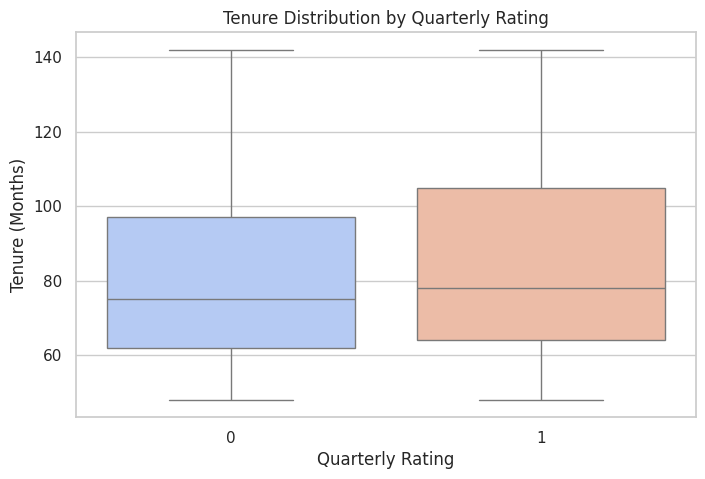

Average Tenure by Quarterly Rating:
   QuarterlyRatingChanged    Tenure
0                       0  80.11901
1                       1  83.21626


In [98]:
# Group data by Quarterly Rating and calculate the average Tenure for each group
# 'rating_tenure' will store the average tenure for drivers, grouped by whether their quarterly rating changed
rating_tenure = Ola.groupby('QuarterlyRatingChanged')['Tenure'].mean().reset_index()

# Explanation:
# - groupby('QuarterlyRatingChanged'): Groups the data by the 'QuarterlyRatingChanged' column.
# - .mean(): Calculates the mean (average) Tenure for each group.
# - .reset_index(): Resets the index of the resulting DataFrame for easier manipulation.
# - This helps to see if there's a relationship between quarterly rating changes and average tenure.

# Create a boxplot for visualizing the distribution of Tenure by Quarterly Rating
# This plot shows how tenure varies depending on whether the quarterly rating has changed
plt.figure(figsize=(8, 5))
sns.boxplot(data=Ola, x='QuarterlyRatingChanged', y='Tenure', palette='coolwarm')
plt.title("Tenure Distribution by Quarterly Rating")
plt.xlabel("Quarterly Rating")
plt.ylabel("Tenure (Months)")
plt.show()

# Explanation:
# - sns.boxplot: Creates a box plot to visualize the distribution of 'Tenure' by 'QuarterlyRatingChanged'.
# - data=Ola: Specifies the DataFrame containing the data.
# - x='QuarterlyRatingChanged', y='Tenure': Defines the columns to be plotted on the x and y axes.
# - palette='coolwarm': Sets the color palette to 'coolwarm' to distinguish changes.



# Display the average Tenure by Quarterly Rating
# Print the average tenure for drivers based on whether their quarterly rating has changed
print("Average Tenure by Quarterly Rating:")
print(rating_tenure)

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

###Observations

- Drivers with a higher quarterly rating (1) have an average tenure of approximately 83.16 months, suggesting they tend to stay with the company longer.
- Drivers with a lower quarterly rating (0) have a slightly shorter average tenure of about 80.06 months, indicating they may be more likely to leave sooner.
- We can see a positive correlation between higher quarterly ratings and longer driver tenure, implying that drivers who perform better are more likely to stay with the company for an extended period.

# **3. Class Imbalance Treatment**

- What is it: Class imbalance refers to a challenging issue in data analysis where there is a disproportionate ratio of instances between different classes. This imbalance can affect the performance of machine learning models, making it difficult to accurately predict the minority class.

More details can be checked by visiting https://scikit-learn.org/stable/modules/ensemble.html?form=MG0AV3#imbalanced-data

### Check for class imbalance in the target variable

In this case I will first check the class distribution for the target variable Attrition. If there is an imbalance, I will try to address the imbalance using techniques like oversampling, undersampling, or synthetic data generation if necessary

In [99]:
# Check the distribution of the target variable 'Attrition' to see how many drivers have left vs. stayed
# Print the count of drivers who have left (Attrition = 1) and those who have stayed (Attrition = 0)
print(Ola['Attrition'].value_counts())

# Explanation:
# - .value_counts(): Counts the number of occurrences of each unique value in the 'Attrition' column.
# - This method helps us understand the distribution of the target variable, showing how many drivers have left the company (Attrition = 1) versus those who have stayed (Attrition = 0).


Attrition
1    19104
Name: count, dtype: int64


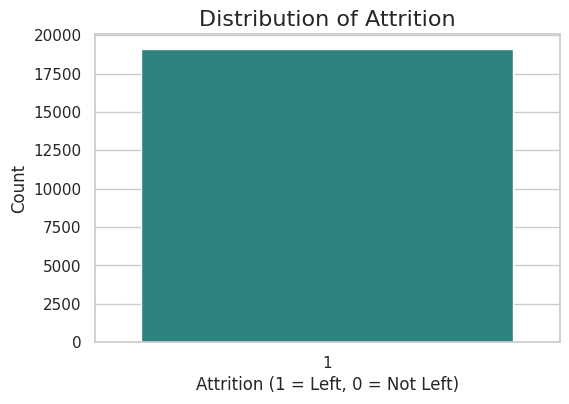

In [100]:
# Plotting the distribution of the 'Attrition' target variable to visualize how many drivers have left vs. stayed
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=Ola, palette='viridis')

# Adding labels and title to the plot for better understanding
# This plot helps us see the distribution of drivers who have left the company versus those who have stayed
plt.title('Distribution of Attrition', fontsize=16)
plt.xlabel('Attrition (1 = Left, 0 = Not Left)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Explanation:
# - plt.figure(figsize=(6, 4)): Sets the size of the figure to 6 inches wide and 4 inches tall for better readability.
# - sns.countplot: Creates a count plot to visualize the frequency distribution of the 'Attrition' column.
# - x='Attrition', data=Ola: Defines the column to be plotted on the x-axis and specifies the DataFrame containing the data.
# - palette='viridis': Sets the color palette to 'viridis' for the plot.
# - plt.title, plt.xlabel, plt.ylabel: Adds a title and labels to the plot for better understanding.


Observations:

- There is no variability in the target variable since the only class present is 1 (drivers who have left). Class 0 (active drivers) is completely missing.

- This is a case of severe class imbalance, as there is no representation of active drivers (Driver_Left = 0).

###Address imbalance using techniques like oversampling, undersampling, or synthetic data generation if necessary

###***In this case I will use synthetic data generation to address the class imbalance***

What is it: Synthetic data are artificially generated data rather than produced by real-world events. Typically created using algorithms, synthetic data can be deployed to validate mathematical models and to train machine learning models. To check more details please visit this link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?form=MG0AV3

Why I have not used Oversampling and Undersampling. It is because of:

- Oversampling duplicates data: This approach generates new synthetic samples instead.
- Undersampling discards data: This method retains all original data.

Advantages of this technique:

- Customizable: Allows flexibility in defining feature ranges and distributions.
- No Data Duplication: Avoids overfitting caused by repeated duplication of existing samples.
- Improves Balance: Balances the class distribution effectively





In [101]:
# Separate the data into two classes: drivers who have left (Attrition = 1) and those who haven't (Attrition = 0)
# 'class_1' will store the subset of the data where drivers have left the company
class_1 = Ola[Ola['Attrition'] == 1]

# Explanation:
# - Ola[Ola['Attrition'] == 1]: Filters the DataFrame to include only rows where the 'Attrition' column is equal to 1.
# - This subset, stored in 'class_1', represents the drivers who have left the company.

# Create an empty DataFrame for the drivers who haven't left (we'll populate this later)
# 'class_0' will eventually store the subset of the data where drivers haven't left the company
class_0 = pd.DataFrame(columns=class_1.columns)

# Explanation:
# - pd.DataFrame(columns=class_1.columns): Creates an empty DataFrame with the same columns as 'class_1'.
# - This empty DataFrame, stored in 'class_0', is intended to eventually hold the subset of data where drivers haven't left the company.

In [102]:
# Generate synthetic data for class 0 to match the distribution of class_1, but with the label set to 0
# 'n_samples' will store the number of samples in class 1
n_samples = len(class_1)  # Generate the same number of samples as in class 1

# Explanation:
# - len(class_1): Calculates the number of samples in class_1.
# - n_samples: Stores the count of samples to be generated for class_0, matching the count of class_1.


# Create synthetic data for class 0 by sampling rows from class_1 with replacement
# This synthetic data will have the same distribution as class_1
class_0_synthetic = class_1.sample(n=n_samples, replace=True)  # Sample rows from class_1 to create synthetic class_0

# Explanation:
# - class_1.sample(n=n_samples, replace=True): Samples rows from class_1 with replacement to create synthetic data for class_0.
# - replace=True: Allows sampling with replacement, ensuring the same number of samples as in class_1 can be generated even if class_1 has fewer unique rows.
# - This synthetic data for class_0 will have the same distribution as class_1 but will represent drivers who haven't left the company.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [103]:
# Set the 'Attrition' column to 0 for the synthetic class 0 data
# This step ensures that the synthetic data for class 0 correctly reflects drivers who have not left the company
class_0_synthetic['Attrition'] = 0

# Explanation:
# - class_0_synthetic['Attrition'] = 0: Sets the 'Attrition' column to 0 for all rows in the synthetic class 0 data.
# - This ensures that the synthetic data accurately represents drivers who have not left the company, providing a balanced dataset for analysis or modeling.


In [104]:
# Combine the original class 1 data with the synthetic class 0 data to create a balanced dataset
# This step concatenates the original class 1 data (drivers who have left) with the synthetic class 0 data (drivers who haven't left)
# The result is a balanced dataset with an equal number of drivers who have left and haven't left
balanced_data = pd.concat([class_1, class_0_synthetic])

# Explanation:
# - pd.concat([class_1, class_0_synthetic]): Concatenates the DataFrames 'class_1' and 'class_0_synthetic'.
# - The result is stored in 'balanced_data', which contains an equal number of drivers who have left (class_1) and drivers who haven't left (class_0_synthetic).
# - This balanced dataset is useful for further analysis or modeling, ensuring that the classes are equally represented.


In [105]:
# Verify the new class distribution to ensure our dataset is balanced
# Print the count of drivers who have left (Attrition = 1) and those who haven't (Attrition = 0) in the balanced dataset
print(balanced_data['Attrition'].value_counts())

# Explanation:
# - .value_counts(): Counts the number of occurrences of each unique value in the 'Attrition' column.
# - This method helps to verify that the balanced dataset has an equal number of drivers who have left the company (Attrition = 1) and those who haven't (Attrition = 0).

Attrition
1    19104
0    19104
Name: count, dtype: int64


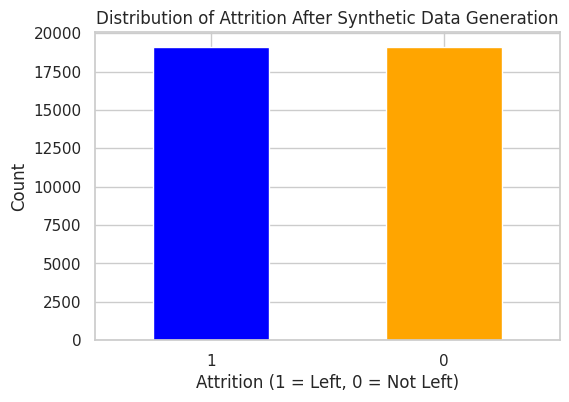

In [106]:
# Plot the distribution of the target variable 'Attrition' after generating synthetic data
# This plot helps us visualize how the dataset is balanced after generating synthetic data
plt.figure(figsize=(6, 4))
balanced_data['Attrition'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution of Attrition After Synthetic Data Generation")
plt.xlabel("Attrition (1 = Left, 0 = Not Left)")
plt.ylabel("Count")
plt.xticks([0, 1], ['1', '0'], rotation=0)  # Set custom labels and rotation for x-axis ticks
plt.show()  # Display the plot

# Explanation:
# - plt.figure(figsize=(6, 4)): Sets the size of the figure to 6 inches wide and 4 inches tall for better readability.
# - balanced_data['Attrition'].value_counts().plot(kind='bar', color=['blue', 'orange']): Creates a bar plot to visualize the frequency distribution of the 'Attrition' column after generating synthetic data.
# - kind='bar': Specifies that a bar plot should be created.
# - color=['blue', 'orange']: Sets the colors for the bars representing the two classes (Attrition = 1 and Attrition = 0).
# - plt.title, plt.xlabel, plt.ylabel: Adds a title and labels to the plot for better understanding.
# - plt.xticks([0, 1], ['1', '0'], rotation=0): Sets custom labels and rotation for x-axis ticks to display '1' and '0' with no rotation.



### Observations:

- Here we can see that the visualization shows a nearly balanced class distribution between Driver_Left = 1 (drivers who left) and Driver_Left = 0 (active drivers) with similar counts for both classes.
- After applying synthetic data generation for balancing the dataset, the distribution of the target variable (Attrition) is now equal.
Both classes (Attrition = 1 for drivers who left and Attrition = 0 for drivers who have not left) have an equal number of 19,104 samples each.
- This balance will help in further analysis.

### ***Standardization***
**Standardization**

**What is it:** Standardization is a data preprocessing technique used in statistics and machine learning to transform the features of your dataset so that they have a mean of 0 and a standard deviation of 1. This process involves rescaling the distribution of values so that the mean of observed values is aligned to 0 and the standard deviation to 1.

**Purpose:** Standardization aims to adjust the scale of data without distorting differences in the ranges of values or losing information.

**Comparison:** Unlike other scaling techniques, standardization maintains all original data points' information (except for cases of constant columns).

**Benefit:** It ensures that no single feature dominates the model's output due to its scale, leading to more balanced and interpretable models.

For more details, please visit (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


### Standardize numerical features to ensure they are on the same scale

In [107]:
# First, let's check which columns contain numerical data
# 'numerical_columns' will store the names of columns that contain numerical data (int64 and float64 types)
numerical_columns = Ola.select_dtypes(include=['int64', 'float64']).columns

# Explanation:
# - select_dtypes(include=['int64', 'float64']): Selects columns in the DataFrame that have data types 'int64' or 'float64'.
# - .columns: Extracts the column names of the selected numerical columns.
# - This step helps identify which columns contain numerical data for further analysis.

# Now, let's print out these numerical columns so we can see them
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Attrition', 'Tenure', 'QuarterlyRatingChanged',
       'IncomeIncreased'],
      dtype='object')


In [108]:
# Let's list out the numerical columns that we need to standardize
# 'numerical_columns' is a list of columns that contain numerical data to be standardized
numerical_columns = ['Age', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating', 'Tenure']

# These are the columns we'll be focusing on for standardization

In [109]:
# To standardize our numerical columns, we'll start by initializing the StandardScaler
# 'scaler' will be an instance of StandardScaler, which will be used to standardize numerical data
scaler = StandardScaler()

# Explanation:
# - from sklearn.preprocessing import StandardScaler: Imports the StandardScaler class from sklearn, a popular machine learning library in Python.
# - StandardScaler(): Creates an instance of the StandardScaler, which standardizes features by removing the mean and scaling to unit variance.
# - This step is essential for ensuring that numerical data is on a similar scale, which can improve the performance of various machine learning algorithms.

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [110]:
# Now, let's standardize our numerical columns to ensure they have a mean of 0 and standard deviation of 1
# This step applies the StandardScaler to transform the numerical columns
# Standardizing ensures each feature has a mean of 0 and a standard deviation of 1, making them comparable
Ola[numerical_columns] = scaler.fit_transform(Ola[numerical_columns])

# Explanation:
# - scaler.fit_transform(Ola[numerical_columns]): Fits the StandardScaler to the numerical columns and transforms them.
# - fit_transform: Combines the fit and transform operations to standardize the data in one step.
# - Ola[numerical_columns]: Specifies the numerical columns of the DataFrame 'Ola' to be standardized.
# - Standardizing ensures that each feature has a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms that assume input features are on a similar scale.

In [111]:
# Let's take a look at the first few rows of our standardized dataset
# This step prints the first few rows of the standardized numerical columns to verify that the standardization process worked correctly
print("Standardized Numerical Columns:")
print(Ola[numerical_columns].head())

Standardized Numerical Columns:
        Age    Income  Joining Designation     Grade  Total Business Value  \
0 -1.066973 -0.267358            -0.825051 -1.220348              1.603674   
1 -1.066973 -0.267358            -0.825051 -1.220348             -1.096482   
2 -1.066973 -0.267358            -0.825051 -1.220348             -0.506666   
3 -0.586809  0.044122             0.369747 -0.246150             -0.506666   
4 -0.586809  0.044122             0.369747 -0.246150             -0.506666   

   Quarterly Rating    Tenure  
0         -0.008812 -0.364250  
1         -0.008812 -0.364250  
2         -0.008812 -0.364250  
3         -0.999102 -1.316183  
4         -0.999102 -1.316183  


### Observations (as per the above output this standardization has following effects on the numberical columns)

- Age and Attrition: Drivers with lower standardized Age values (e.g., -1.066973) might represent younger individuals. Exploring whether younger drivers exhibit higher attrition trends could yield insights into retention challenges among new/recently joined drivers.

- Income and Attrition: Drivers with below-average incomes (e.g., -0.267358) might have higher attrition rates due to financial dissatisfaction.

- Tenure and Attrition: The negative Tenure values (e.g., -0.352851) suggest that these drivers have shorter tenures compared to others. Shorter-tenured drivers are more likely to leave the company.

- Quarterly Rating and Attrition: Drivers with lower Quarterly Rating scores (e.g., -0.999102) may correlate with higher attrition. This suggests a potential link between performance ratings and driver motivation to stay.

- Total Business Value and Attrition: Drivers with lower standardized Joining Designation values (e.g., -0.825051) might have started in entry-level roles, potentially facing challenges that lead to higher attrition.

- Grade and Attrition: Features like IncomeIncreased and QuarterlyRatingChanged should be analyzed for their impact on attrition. Drivers who didn't experience improvements in income or ratings might show higher attrition rates due to a lack of incentives.

###***Visualize the distribution of each standardized feature***

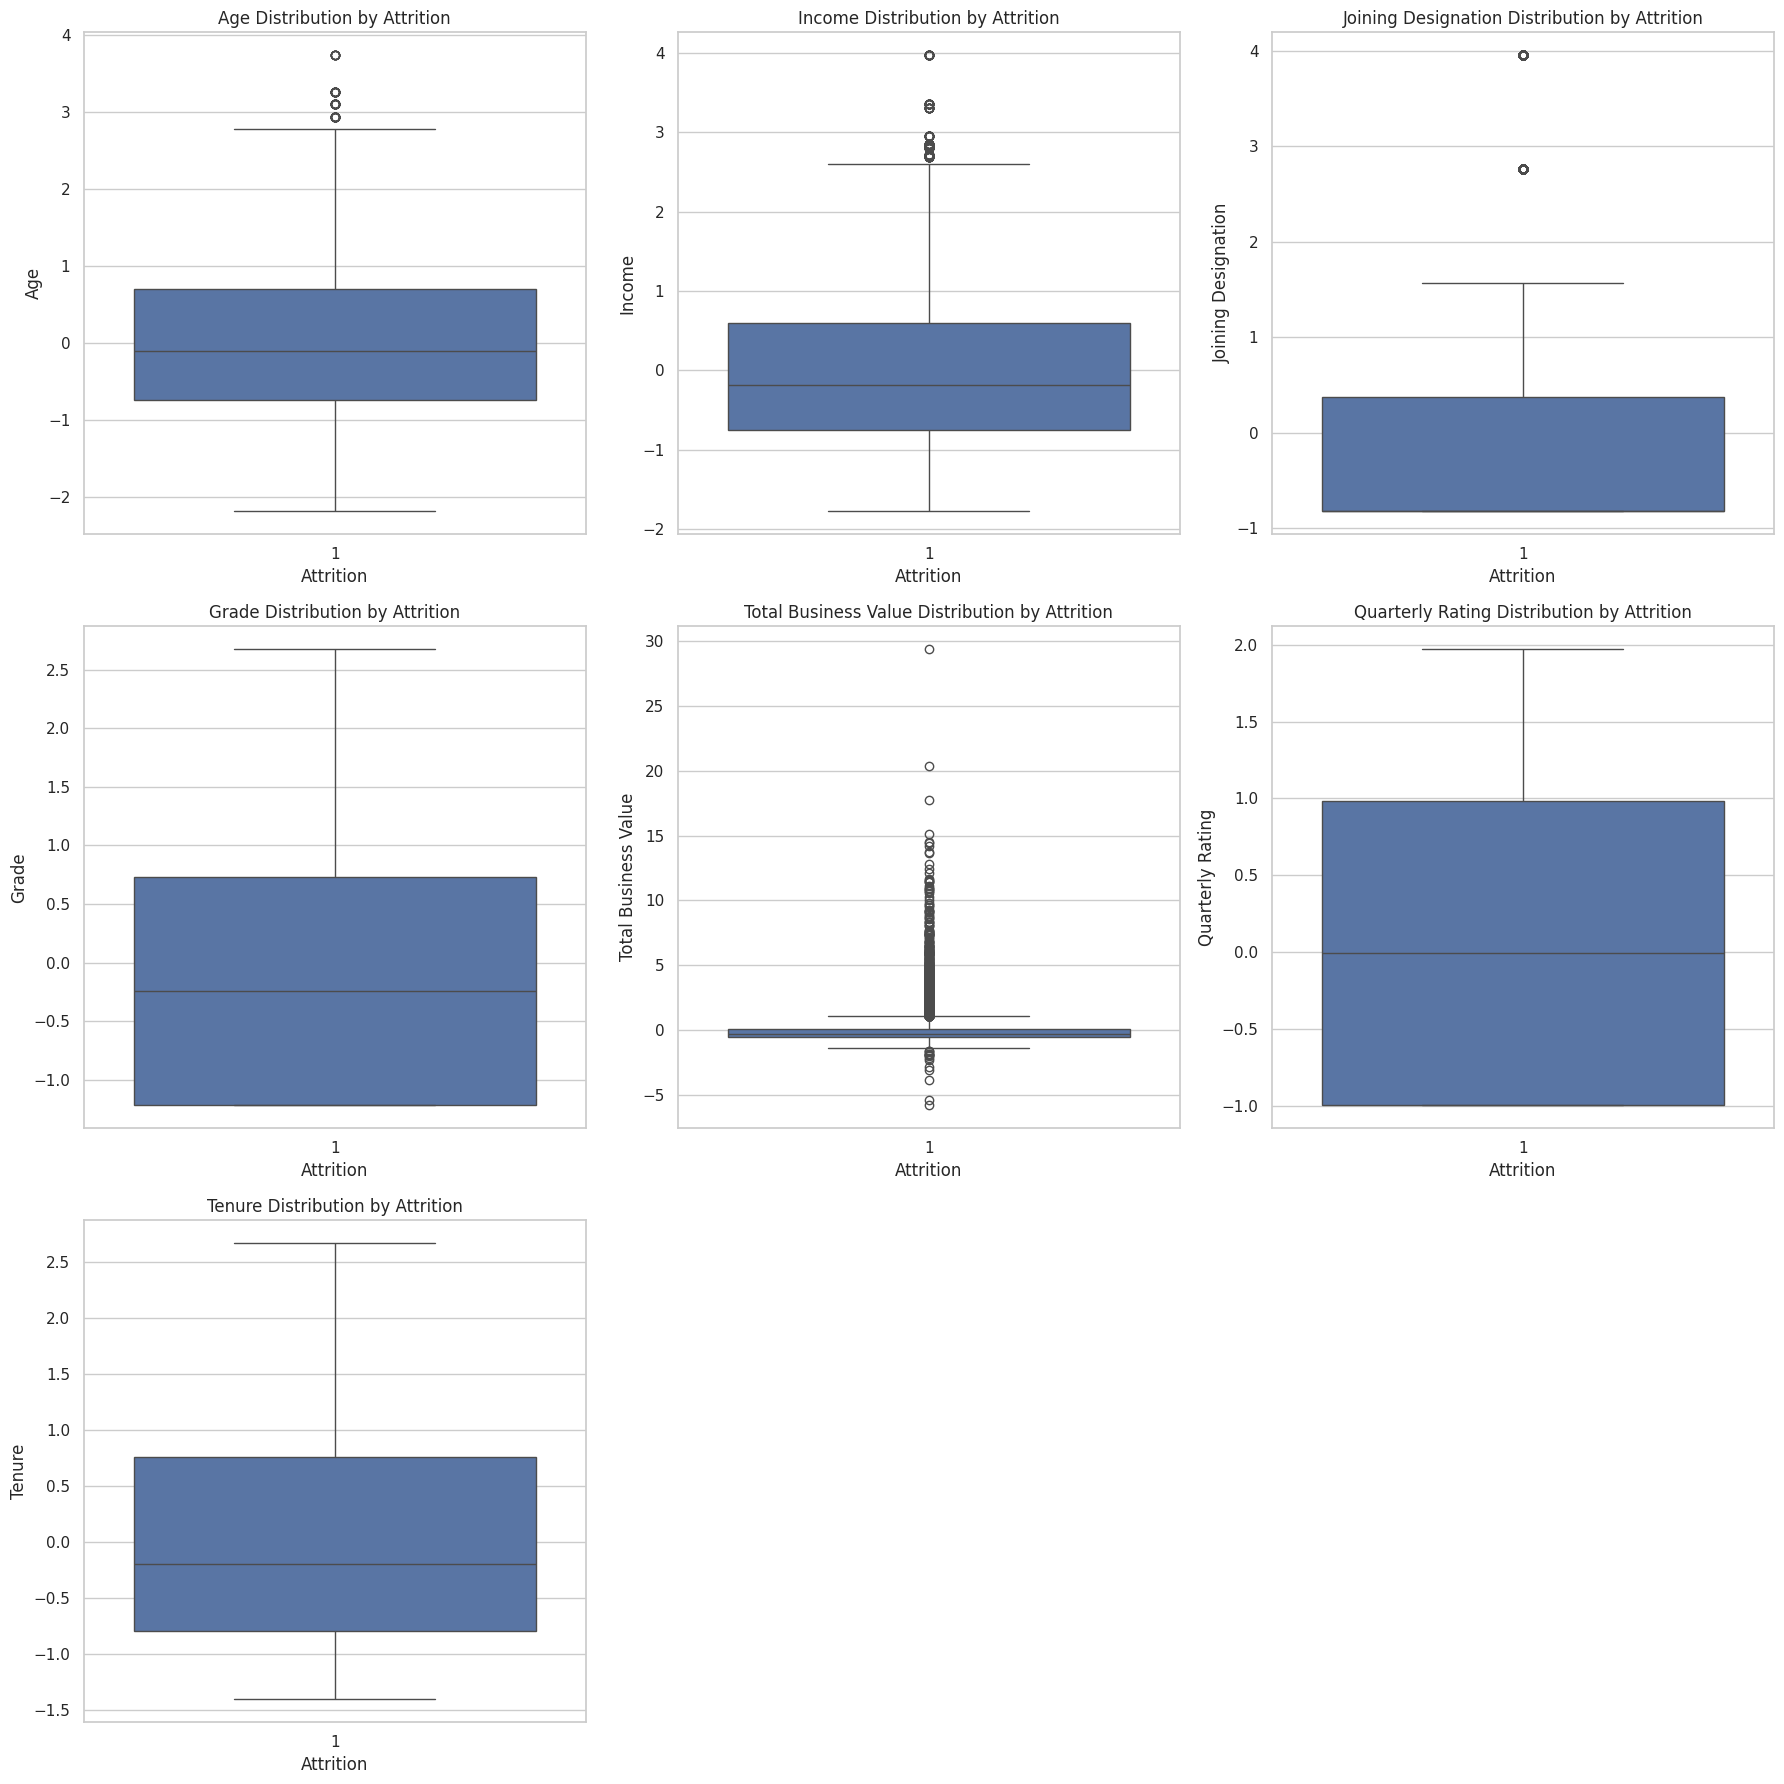

In [112]:
# Let's create a larger grid of subplots for better visualization
# This step sets up a 3x3 grid of subplots with a figure size of 18x18 inches for our visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 18))


# These are the columns we want to analyze
# We are focusing on key numerical columns to visualize their distribution by 'Attrition'
columns_to_plot = ['Age', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating', 'Tenure']

# Now, we'll loop over the grid and plot each column
# For each column, create a boxplot showing its distribution based on 'Attrition'
for i, column in enumerate(columns_to_plot):
    row = i // 3  # Determine the row index for the subplot
    col = i % 3   # Determine the column index for the subplot
    sns.boxplot(x='Attrition', y=column, data=Ola, ax=axes[row, col])
    axes[row, col].set_title(f'{column} Distribution by Attrition')  # Set the title for each subplot

# Explanation:
# - sns.boxplot: Creates a boxplot for each specified column, showing distribution by 'Attrition'.
# - x='Attrition', y=column, data=Ola: Defines the x-axis, y-axis, and data for the boxplot.
# - ax=axes[row, col]: Specifies the subplot location.

# Reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Removing the last two empty plots to keep the grid neat
# This step removes any empty subplots for a cleaner visualization
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Explanation:
# - fig.delaxes: Deletes the specified empty subplots to keep the grid neat.

# Reference: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.delaxes

# Adjust the layout so everything fits nicely
# Use tight_layout to adjust subplots and fit them nicely within the figure area
plt.tight_layout()
plt.show()  # Display the plots

###Observations

- Age and Tenure: These seem relatively balanced across both groups, but age and tenure distributions for drivers who left show some outliers.
- Income: Drivers with higher income seem to have a higher chances of leaving the company, as evidenced by the wider spread and outliers on the higher end for those who left.
- Total Business Value: There is a significant difference in the distribution between those who stayed and those who left, with lower total business values for drivers who left.
- Quarterly Rating: Lower quarterly ratings seem to correlate with higher attrition.
- Grade and Joining Designation: These features do not show significant variations in their distributions for both groups, suggesting they may not be as relevant for predicting attrition.



###***Encoding***

What is it: Encoding is the process of converting categorical data (text or labels) into numerical values so that machine learning algorithms can process the data.

###***One hot encoding***
Another possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder. One-hot encoding is a method of representing categorical variables as binary vectors. Each unique category is represented as a separate column, where a value of 1 indicates the presence of the category, and 0 indicates its absence.

These details can be checked by visiting https://scikit-learn.org/stable/modules/preprocessing.html

In [113]:
# To prepare for One-hot encoding, let's first identify the categorical columns in our dataset
# 'categorical_columns' will store the names of columns that contain categorical data (object and category types)
categorical_columns = Ola.select_dtypes(include=['object', 'category']).columns

# Explanation:
# - select_dtypes(include=['object', 'category']): Selects columns in the DataFrame that have data types 'object' or 'category'.
# - .columns: Extracts the column names of the selected categorical columns.
# - This step helps identify which columns contain categorical data that need to be one-hot encoded.

# Now, let's print out these categorical columns so we can see them
# Print the list of categorical columns to inspect which ones will be one-hot encoded
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['MMM-YY', 'City', 'LastWorkingDate'], dtype='object')


- We can see that these are the categorical columns in our dataset

 1. MMMM-YY: Reporting Date (Monthly)
 2. City: City Code of the driver
 3. LastWorkingDate: Last date of working for the driver

###***Perform one-hot encoding for categorical variables like Reporting Date, City, and LastWorkingDate***

In [114]:
# Let's make sure we've correctly identified the categorical columns for One-hot encoding
# 'categorical_columns' is a list of columns that contain categorical data to be one-hot encoded
categorical_columns = ['City', 'MMM-YY', 'LastWorkingDate']

# These are the columns we'll be encoding to prepare our dataset

In [115]:
# To convert our categorical columns into numerical format, we'll use One-hot encoding
# 'Ola_encoded' will store the resulting DataFrame with one-hot encoded columns
# The original 'Ola' DataFrame remains unchanged
Ola_encoded = pd.get_dummies(Ola, columns=['MMM-YY', 'City', 'LastWorkingDate'], drop_first=True)

# This will help us prepare the dataset for further analysis by turning categorical data into a suitable format

# Explanation:
# - Ola_encoded assigns the resulting DataFrame (with one-hot encoded columns) to the variable 'Ola_encoded'
# - pd.get_dummies is a pandas function that converts categorical variables into a new set of columns,
#   containing binary indicators (0s and 1s). This is known as one-hot encoding.
# - drop_first=True: Drops the first category from each one-hot encoded column to avoid redundant information

In [116]:
# Display the first few rows of the encoded data
# This step prints the first few rows of the dataset after one-hot encoding to ensure that the encoding process worked correctly
print("Dataset after One-Hot Encoding:")
print(Ola_encoded.head())

Dataset after One-Hot Encoding:
   Driver_ID       Age  Gender  Education_Level    Income Dateofjoining  \
0          1 -1.066973     0.0                2 -0.267358    2018-12-24   
1          1 -1.066973     0.0                2 -0.267358    2018-12-24   
2          1 -1.066973     0.0                2 -0.267358    2018-12-24   
3          2 -0.586809     0.0                2  0.044122    2020-11-06   
4          2 -0.586809     0.0                2  0.044122    2020-11-06   

   Joining Designation     Grade  Total Business Value  Quarterly Rating  ...  \
0            -0.825051 -1.220348              1.603674         -0.008812  ...   
1            -0.825051 -1.220348             -1.096482         -0.008812  ...   
2            -0.825051 -1.220348             -0.506666         -0.008812  ...   
3             0.369747 -0.246150             -0.506666         -0.999102  ...   
4             0.369747 -0.246150             -0.506666         -0.999102  ...   

  LastWorkingDate_30/11/20  La

In [117]:
# Let's list all the columns in our encoded dataset to verify the newly created one-hot encoded columns
# This step prints the names of all columns in the encoded dataset, allowing us to check that one-hot encoding was applied correctly
print(Ola_encoded.columns)

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating',
       ...
       'LastWorkingDate_30/11/20', 'LastWorkingDate_30/12/19',
       'LastWorkingDate_31/01/20', 'LastWorkingDate_31/03/19',
       'LastWorkingDate_31/05/19', 'LastWorkingDate_31/08/19',
       'LastWorkingDate_31/10/19', 'LastWorkingDate_31/10/20',
       'LastWorkingDate_31/12/18', 'LastWorkingDate_31/12/19'],
      dtype='object', length=558)


In [118]:
# Let's check the unique values in one of the newly created one-hot encoded columns to ensure everything looks right
# This step prints the unique values in the 'LastWorkingDate_31/12/19' column to verify the one-hot encoding process
print(Ola_encoded['LastWorkingDate_31/12/19'].unique())

# Explanation:
# - .unique(): Returns the unique values in the specified column.
# - Ola_encoded['LastWorkingDate_31/12/19']: Accesses the one-hot encoded column 'LastWorkingDate_31/12/19' in the DataFrame 'Ola_encoded'.
# - Printing the unique values helps verify that the one-hot encoding process has been applied correctly and that the column contains the expected binary values (0 and 1).

[False  True]


In [119]:
# Let's check for the new one-hot encoded columns we've added to our dataset
# 'encoded_columns' will store the names of the new one-hot encoded columns
encoded_columns = [col for col in Ola_encoded.columns if 'City_' in col or 'MMM-YY_' in col or 'LastWorkingDate_' in col]

# Explanation:
# - List comprehension: Iterates through each column name in the DataFrame 'Ola_encoded'.
# - The if condition checks if 'City_', 'MMM-YY_', or 'LastWorkingDate_' is part of the column name.
# - Columns that match these criteria are included in the 'encoded_columns' list.
# - This step helps identify all the new one-hot encoded columns added to the dataset.

# Now, let's print these columns to verify they were created correctly
# Print the list of one-hot encoded columns to ensure they were added to the dataset
print("One-Hot Encoded Columns:", encoded_columns)

# Explanation:
# - print: Outputs the names of the one-hot encoded columns to the console.
# - This helps verify that the one-hot encoding process was successful and that the new columns are present in the dataset.

One-Hot Encoded Columns: ['MMM-YY_01/01/20', 'MMM-YY_02/01/19', 'MMM-YY_02/01/20', 'MMM-YY_03/01/19', 'MMM-YY_03/01/20', 'MMM-YY_04/01/19', 'MMM-YY_04/01/20', 'MMM-YY_05/01/19', 'MMM-YY_05/01/20', 'MMM-YY_06/01/19', 'MMM-YY_06/01/20', 'MMM-YY_07/01/19', 'MMM-YY_07/01/20', 'MMM-YY_08/01/19', 'MMM-YY_08/01/20', 'MMM-YY_09/01/19', 'MMM-YY_09/01/20', 'MMM-YY_10/01/19', 'MMM-YY_10/01/20', 'MMM-YY_11/01/19', 'MMM-YY_11/01/20', 'MMM-YY_12/01/19', 'MMM-YY_12/01/20', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9', 'LastWorkingDate_01/02/19', 'LastWorkingDate_01/02/20', 'LastWorkingDate_01/03/20', 'LastWorkingDate_01/04/19', 'LastWorkingDate_01/04/20', 'LastWorkingDate_01/05/19', 'LastWorkingDate_01/05/20', 'LastWorkingD

###***Did you see that after performing one hot encoding there is column explosion for the variable lastworking date (it's 492 columns)***

In [120]:
# Let's find all the columns that were created for "LastWorkingDate_" during One-hot encoding
# 'last_working_date_encoded_columns' will store the names of columns that start with 'LastWorkingDate_'
last_working_date_encoded_columns = [col for col in Ola_encoded.columns if 'LastWorkingDate_' in col]

# Now, let's count how many of these encoded columns we have
# 'total_last_working_date_columns' will store the count of one-hot encoded columns for 'LastWorkingDate'
total_last_working_date_columns = len(last_working_date_encoded_columns)

# Finally, let's print out the total number of encoded columns for 'Last Working Date' to verify
# Print the total number of one-hot encoded columns for 'Last Working Date'
print(f"Total number of encoded columns for 'Last Working Date': {total_last_working_date_columns}")

Total number of encoded columns for 'Last Working Date': 492


###***and when I checked the datatype I found that it was converted to a string value***

In [121]:
# Let's check if all the values in the 'LastWorkingDate' column are strings
# 'is_all_strings' will store a boolean value indicating whether all values in the 'LastWorkingDate' column are strings
is_all_strings = Ola['LastWorkingDate'].apply(lambda x: isinstance(x, str)).all()

# Explanation:
# - .apply(lambda x: isinstance(x, str)): Applies a lambda function to each element in the 'LastWorkingDate' column, checking if the element is an instance of str.
# - .all(): Returns True if all elements in the series are True (i.e., all elements are strings), otherwise returns False.
# - is_all_strings: Stores the result as a boolean value, indicating whether all values in the 'LastWorkingDate' column are strings.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html

# Now, let's print out the result to confirm
# Print the result to confirm if all values in 'LastWorkingDate' are strings
print(is_all_strings)

# Explanation:
# - print(is_all_strings): Outputs the boolean result to the console, confirming whether all values in 'LastWorkingDate' are strings.

True


###***So first I need to change this datatype string to a datetime object after that I can easily visualize these columns***

In [122]:
# Let's convert the 'LastWorkingDate' column to datetime format for better manipulation and analysis
# This step converts the 'LastWorkingDate' column to datetime format using the specified date format ('%d/%m/%y')
# 'errors='coerce'' means that any errors in conversion will result in 'NaT' (Not a Time) values
Ola['LastWorkingDate'] = pd.to_datetime(Ola['LastWorkingDate'], format='%d/%m/%y', errors='coerce')

# Explanation:
# - pd.to_datetime(Ola['LastWorkingDate'], format='%d/%m/%y', errors='coerce'): Converts the 'LastWorkingDate' column to datetime format.
# - format='%d/%m/%y': Specifies the format of the date strings in the column (day/month/year).
# - errors='coerce': Ensures that any errors in conversion (e.g., invalid date strings) will be converted to 'NaT' (Not a Time) values.


# Now, let's check the first few rows to ensure the conversion worked correctly
# Print the first few rows of the 'LastWorkingDate' column to verify the conversion to datetime format
print(Ola['LastWorkingDate'].head())

# Explanation:
# - .head(): Returns the first five rows of the 'LastWorkingDate' column, allowing you to verify that the conversion was successful.
# - This step helps ensure that the dates are correctly formatted and can be used for further analysis.

# And let's print the data type of the 'LastWorkingDate' column to confirm it's now in datetime format
# Print the data type of the 'LastWorkingDate' column to ensure it's been converted to datetime format
print(Ola['LastWorkingDate'].dtype)

# Explanation:
# - .dtype: Returns the data type of the 'LastWorkingDate' column.
# - This step confirms that the column has been successfully converted to datetime format.

0   2020-07-29
1   2020-07-29
2   2019-11-03
3   2020-07-29
4   2020-07-29
Name: LastWorkingDate, dtype: datetime64[ns]
datetime64[ns]


###***Now we can see that it has been successfully converted to date time format and is ready for visualization, here are the reason for converting LastWorkingDate format to datetime***

- Dates in their raw form (e.g., as strings) can be inconsistent and harder to work with for analysis or visualization. So, basically I have parsed the data.
- With datetime, I can easily group data by specific periods (e.g., monthly, quarterly). This helps in summarizing data, such as counting the number of occurrences within a given time frame.
- Most data visualization libraries (e.g., Matplotlib, Seaborn) are designed to work more effectively with date and time data in datetime format. This allows for smoother plotting and customization of time-related visualizations

###***Let's check the visualization impact of the encoded columns***

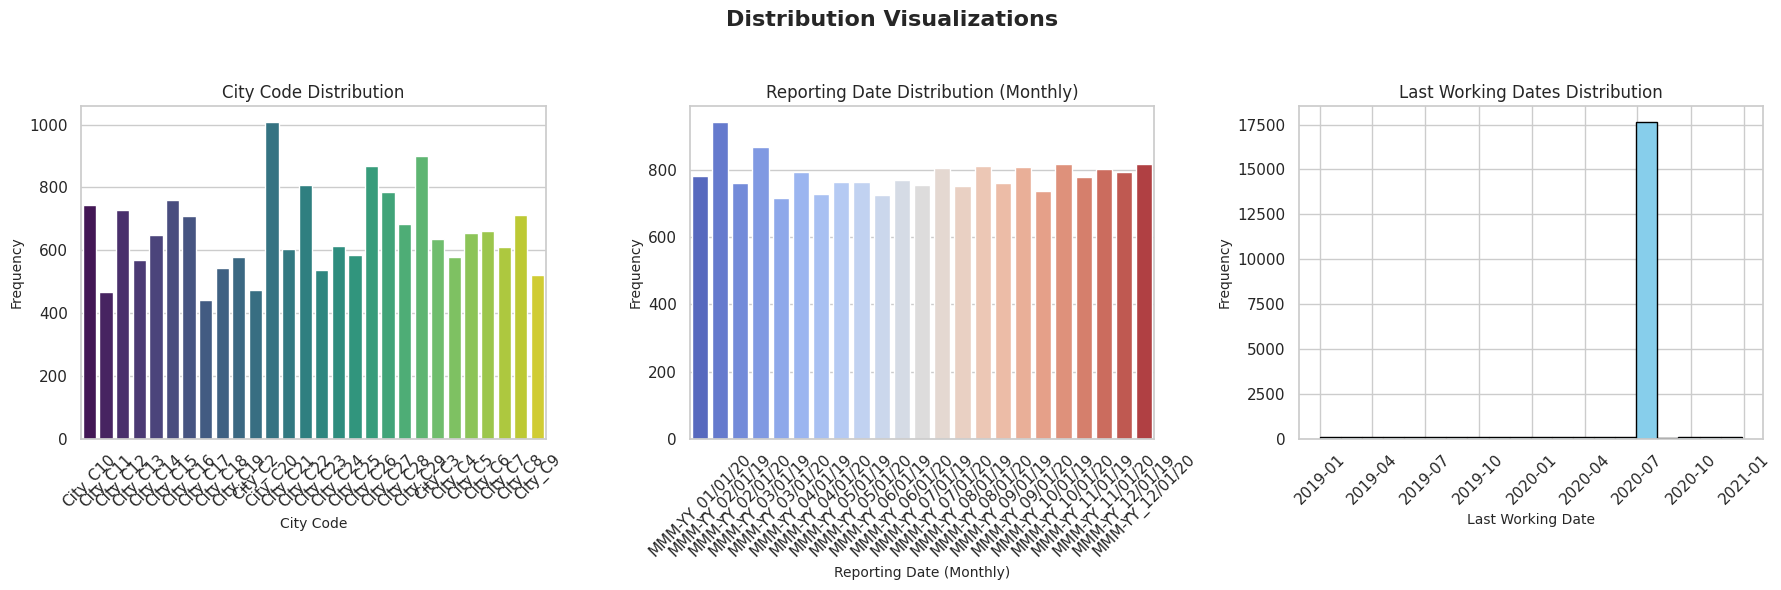

In [123]:
# First, we'll set a clean and consistent style for our seaborn plots
# This sets the style of seaborn plots to "whitegrid" for better visualization
sns.set(style="whitegrid")

# Explanation:
# - sns.set(style="whitegrid"): Sets the style of seaborn plots to "whitegrid" for a clean and consistent look.


# Now let's calculate the data we need for visualization
# Sum the values for all the 'City_' columns to see the distribution of drivers by city
city_sums = Ola_encoded[[col for col in encoded_columns if 'City_' in col]].sum()

# Explanation:
# - [col for col in encoded_columns if 'City_' in col]: Filters the columns that contain 'City_'.
# - .sum(): Sums the values for these columns to see the distribution of drivers by city.


# Sum the values for all the 'MMM-YY_' columns to understand the distribution by reporting date
mmm_yy_sums = Ola_encoded[[col for col in encoded_columns if 'MMM-YY_' in col]].sum()

# Explanation:
# - [col for col in encoded_columns if 'MMM-YY_' in col]: Filters the columns that contain 'MMM-YY_'.
# - .sum(): Sums the values for these columns to understand the distribution by reporting date.

# We'll create a single page with 3 subplots for our visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution Visualizations', fontsize=16, fontweight='bold')


# Plot 1: Visualize the distribution of City Code of the drivers
sns.barplot(ax=axes[0], x=city_sums.index, y=city_sums.values, palette="viridis")
axes[0].set_title('City Code Distribution', fontsize=12)
axes[0].set_xlabel('City Code', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the distribution of city codes.
# - x=city_sums.index, y=city_sums.values: Sets the x and y data for the plot.
# - palette="viridis": Sets the color palette.
# - tick_params: Rotates the x-axis labels for better readability.


# Plot 2: Visualize the distribution of Reporting Date (Monthly)
sns.barplot(ax=axes[1], x=mmm_yy_sums.index, y=mmm_yy_sums.values, palette="coolwarm")
axes[1].set_title('Reporting Date Distribution (Monthly)', fontsize=12)
axes[1].set_xlabel('Reporting Date (Monthly)', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

# Explanation:
# - sns.barplot: Creates a bar plot to visualize the distribution of reporting dates.
# - x=mmm_yy_sums.index, y=mmm_yy_sums.values: Sets the x and y data for the plot.

# Plot 3: Visualize the distribution of Last Working Dates
axes[2].hist(Ola['LastWorkingDate'], bins=20, edgecolor='black', color='skyblue')
axes[2].set_title('Last Working Dates Distribution', fontsize=12)
axes[2].set_xlabel('Last Working Date', fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].tick_params(axis='x', rotation=45)

# Explanation:
# - axes[2].hist: Creates a histogram to visualize the distribution of last working dates.
# - bins=20: Sets the number of bins for the histogram.
# - edgecolor='black', color='skyblue': Sets the colors for the histogram.



# Adjust the layout to ensure everything fits nicely
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the title spacing
plt.show()

# Explanation:
# - plt.tight_layout(rect=[0, 0, 1, 0.95]): Adjusts the layout to ensure that subplots fit nicely within the figure area, adjusting the title spacing.

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html


## Observations

### Distribution of City Code of the Driver  

- City **C20** and **C22** have the highest frequency of drivers, with City **C22** having just under 1000 drivers. These cities show significant engagement and driver participation.  
- Cities **C10**, **C11**, and **C12** also have a relatively high number of drivers, indicating they may be important areas of focus for driver management or retention.  
- Cities like **C8**, **C9**, and **C3** show comparatively lower numbers of drivers. These cities could be experiencing lower engagement or might require targeted attention for improving driver retention.


### Distribution of Reporting Date (Monthly)  

- **January 2020** (MMM-YY 01/2020) shows the highest frequency, represented by the darkest blue shade. This suggests a significant number of drivers reported or were active during this month.  
- From **February 2019** to **March 2020**, the reporting frequencies are generally similar, with a gradual decrease towards later months, as indicated by lighter shades.  
- **May 2019 to July 2019** (MMM-YY 05/2019 to MMM-YY 07/2019) have relatively lower reporting frequencies, represented by the lightest colors on the chart.  
- There is no sharp seasonality visible; however, slight peaks in **January 2020** could indicate higher activity levels possibly due to the new year period. The mid-2019 dip may reflect seasonal or operational factors impacting driver activity.



### Distribution of Last Working Dates  

- **July 2020** shows a peak with approximately **17,500 drivers exiting** during this month. This could be due to factors such as:  
   - Policy changes or contractual shifts.  
   - Economic downturns (e.g., the pandemic).  
   - Company-level changes, including layoffs or operational restructuring.  
- Very few exits are observed in other months, such as **2019** or early **2020**, indicating a stable trend before the peak in July 2020.  





# **4. Actionable Insights & Recommendations**

###***Identify key factors influencing driver attrition***

## **Actionable Insights**
### **Driver related (General Observations)**  
- In the dataset 58% are male drivers, while 42% are female drivers.  
- Most drivers are between 30-40 years old, while younger (<25) and older (>50) drivers are underrepresented.  
- The majority hold 10+2 or graduate degrees, suggesting a well-educated workforce.  
- Cities like C20 and C22 have the highest number of drivers whereas C10, C11, and C12 show moderate engagement, while C8, C9, and C3 report lower numbers.  
- Median income is ₹60,087, but significant variations exist, leading to dissatisfaction among low-income drivers.  
- A large number of (17,500) drivers exited in July 2020, possibly due to economic or policy-related factors.  
- Most drivers are in Grade 2 and Grade 1, while Grade 4 and 5 have fewer drivers, indicating underperformance.    
- Cities with lower driver counts (e.g., C3, C8) show reduced engagement, requiring targeted interventions.  
- Exit rates spike under specific conditions like seasonal changes, economic downturns, or policy shifts.  
- Male drivers dominate high-performing categories, while female drivers show consistent mid-level performance.  
- Low-income earners have a higher tendency to churn.  
- Driver engagement and attrition rates vary across cities, requiring city-specific strategies.  



### **Driver ratings**  
- A significant number of drivers are in **Rating 1 and 2**, while fewer drivers achieve higher ratings.  
- Drivers with consistently low ratings are more likely to exit, reflecting dissatisfaction or underperformance.



### **Change in ratings for different cities**  
- Drivers in **Cities C20 and C22** show the highest average ratings, correlating with high driver counts.  
- Cities like **C8, C9**, and **C3** have lower ratings, indicating poor engagement or operational issues.  
- Ratings tend to remain stable across high-engagement cities but drop significantly in cities with low participation.



### **Effect on business value when ratings decrease**  
- Business value drops significantly when ratings fall below **Rating 2**, with a clear correlation between lower ratings and lower revenues.  
- Negative outliers in business value are directly linked to drivers with consistently low ratings, impacting overall profitability.


### **Effect of ratings based on the month of the year**  
- Ratings peak in January 2020, possibly due to new year incentives and operational pushes.  
- Mid-2019 (May-July) shows lower ratings, aligning with reduced reporting frequencies.  
- Ratings stabilize in later months but show a gradual decline toward mid-2020, indicating operational or engagement challenges.


### **Effect of ratings based on city**  
- Cities like C20 and C22 show better performance, with drivers maintaining higher average ratings.  
- Cities such as C8 and C3 have drivers with consistently lower ratings.  


### **Other features affecting quarterly rating**  
- Drivers earning lower incomes tend to have lower ratings, indicating dissatisfaction.  
- Drivers with 2-5 years of experience perform best, while new drivers (<1 year) show lower ratings due to limited exposure.  
- Overburdened drivers exhibit decreased ratings, suggesting a negative impact of excessive workloads on performance.




###***Recommend strategies to improve driver retention***

## **Recommendations**  
- Drivers should be given regular raises to ensure satisfaction and reduce attrition.  
- Establish a formal feedback mechanism to understand expectations and grievances, especially for new joiners and low-performing drivers.  
- Change rating evaluations from quarterly to monthly for better tracking and performance management.  
- Investigate high attrition months (e.g., July 2020) to identify policy or economic factors affecting exits.  
- Distribute workload evenly to prevent performance drops caused by driver fatigue.  
- Provide income-linked incentives or bonuses to motivate low-income drivers and reduce churn.  
- Encourage female driver participation through targeted recruitment campaigns and support initiatives.  
- Recognize and reward drivers achieving higher ratings to boost morale and retention.  



# **4. Question Distribution**

##**Basic Level Questions (10 points)**##
**1.Data Structure and Overview**:

-**Question**: What is the structure of the dataset (number of rows and columns)?


In [124]:
# Checking the shape of the dataset
Ola.shape

# ans. Total rows are 19104 and Total Columns are 14

(19104, 18)

-**Question**: What are the data types of each column?

In [125]:
# Checking the data types of the columns in the dataset
Ola.dtypes

#ans) Below are the datatypes for each column

,0
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,float64
Dateofjoining,datetime64[ns]
LastWorkingDate,datetime64[ns]
Joining Designation,float64


-**Question**: Are there any missing values in the dataset? If so, which columns are affected?

-**Answer** Column LastWorkingDate has 17488, Age column has 61 and gender column has 52 missing values respectively

##**2. Descriptive Statistics:**

-**Question**: What are the basic statistics (mean, median, standard deviation) for numerical features like Age, Income, Total Business Value, and Quarterly Rating?

-**Answer**: Below are the basic statistics for numerical features like Age, Income, Total Business Value, and Quarterly Rating


In [126]:
# Compute basic statistics for specified numerical columns
basic_stats = Ola[['Age', 'Income', 'Total Business Value', 'Quarterly Rating']].describe()

# Display the basic statistics
basic_stats

,Age,Income,Total Business Value,Quarterly Rating
count,19104.000000,1.910400e+04,1.910400e+04,1.910400e+04
mean,0.000000,2.291114e-16,1.487736e-17,8.628869e-17
std,1.000026,1.000026e+00,1.000026e+00,1.000026e+00
min,-2.187356,-1.776074e+00,-5.824482e+00,-9.991019e-01
25%,-0.746863,-7.527090e-01,-5.066656e-01,-9.991019e-01
50%,-0.106645,-1.800181e-01,-2.850900e-01,-8.812251e-03
75%,0.693629,5.925195e-01,1.134804e-01,9.814774e-01
max,3.734669,3.971247e+00,2.940403e+01,1.971767e+00


-**Question**: How many unique drivers are there in the dataset?

In [127]:
# Listing all the columns in the dataset
Ola.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Month',
       'Attrition', 'Tenure', 'QuarterlyRatingChanged', 'IncomeIncreased'],
      dtype='object')

In [128]:
# Calculate the number of unique drivers in the dataset
unique_drivers = Ola['Driver_ID'].nunique()

# Display the number of unique drivers
unique_drivers

#ans) 2381

2381

##**3. Temporal Analysis**

-**Question**: How many drivers joined and left each month?
-**Answer**: I have segregatted this part as driver_joined and drivers_left

In [129]:
# Extract the month and year from the DateofJoining and LastWorkingDate columns
# 'JoinMonth' and 'LeftMonth' will store the period (month and year) for joining and leaving dates, respectively
Ola['JoinMonth'] = pd.to_datetime(Ola['Dateofjoining']).dt.to_period('M')
Ola['LeftMonth'] = pd.to_datetime(Ola['LastWorkingDate']).dt.to_period('M')

# Explanation:
# - pd.to_datetime: Converts the 'Dateofjoining' and 'LastWorkingDate' columns to datetime format.
# - .dt.to_period('M'): Extracts the month and year from the datetime values, converting them to a period format (e.g., '2024-12').
# - This step creates new columns 'JoinMonth' and 'LeftMonth' to store the joining and leaving periods.

# Count the number of drivers who joined and left each month
# 'drivers_joined' will contain the count of drivers who joined each month
# 'drivers_left' will contain the count of drivers who left each month
drivers_joined = Ola.groupby('JoinMonth').size()
drivers_left = Ola.groupby('LeftMonth').size()

# Explanation:
# - groupby('JoinMonth').size(): Groups the data by 'JoinMonth' and counts the number of entries in each group, providing the count of drivers who joined each month.
# - groupby('LeftMonth').size(): Groups the data by 'LeftMonth' and counts the number of entries in each group, providing the count of drivers who left each month.
# - These steps create Series 'drivers_joined' and 'drivers_left', containing the monthly counts of joining and leaving drivers.


In [130]:
#Let's check the number of drivers who joined each month using the drivers_joined variable
drivers_joined

,0
JoinMonth,
2013-04,31
2013-05,24
2013-06,59
2013-07,63
2013-08,33
...,...
2020-08,325
2020-09,314
2020-10,139


In [131]:
# Let's check the number of drivers who left each month using the drivers_left variable
drivers_left

,0
LeftMonth,
2018-12,5
2019-01,81
2019-02,70
2019-03,75
2019-04,72
2019-05,84
2019-06,64
2019-07,55
2019-08,56


-**Question**: Can we determine the average tenure of drivers in the dataset?

-**Answer**: It's 26.79

In [132]:
# Calculate the tenure of drivers (in months)
# 'Tenure' will store the tenure of each driver in months
Ola['Tenure'] = (pd.to_datetime(Ola['LastWorkingDate']) - pd.to_datetime(Ola['Dateofjoining'])).dt.days / 30

# Calculate the average tenure
# 'average_tenure' will store the average tenure of drivers in months
average_tenure = Ola['Tenure'].mean()

# Output: Average tenure of drivers in months
average_tenure

26.798031825795643

##**4. Intermediate Level Questions (30 points)**

-**Question**: How can we create a target variable to indicate whether a driver has left the company based on LastWorkingDate?

-**Answer**: as per the below output almost all the drivers seems to be left

In [133]:
# Create a target variable indicating if the driver has left (1 if left, 0 if still working)
# 'HasLeft' will store a binary value: 1 if the driver has left (LastWorkingDate is not null), 0 if still working
Ola['HasLeft'] = Ola['LastWorkingDate'].notnull().astype(int)

# Output: New column indicating driver attrition
Ola['HasLeft']

,HasLeft
0,1
1,1
2,1
3,1
4,1
...,...
19099,1
19100,1
19101,1
19102,1


-**Question**: What additional features can we extract from DateofJoining, such as tenure or duration of employment?

In [134]:
# Extract tenure in months as a new feature
# 'TenureMonths' will store the tenure of each driver in months
Ola['TenureMonths'] = (pd.to_datetime(Ola['LastWorkingDate']) - pd.to_datetime(Ola['Dateofjoining'])).dt.days / 30

# Output: New 'TenureMonths' column
# Display the 'TenureMonths' column to see the tenure of each driver in months
Ola['TenureMonths']

,TenureMonths
0,19.433333
1,19.433333
2,10.466667
3,-3.333333
4,-3.333333
...,...
19099,1.700000
19100,1.700000
19101,1.700000
19102,1.700000


##**5. Exploratory Data Analysis (EDA):**

-**Question**: What are the distributions of Age, Income, and Total Business Value?

-**Answer**:
- Age distribution indicates that there are more younger drivers in the dataset, as seen from the higher counts in the left portion of the graph
- Income distribution indicates that a majority of drivers earn lower incomes, while fewer drivers have high incomes.
- The total business values indicates that most drivers have very low or near-zero business values, but a few drivers have exceptionally high business values

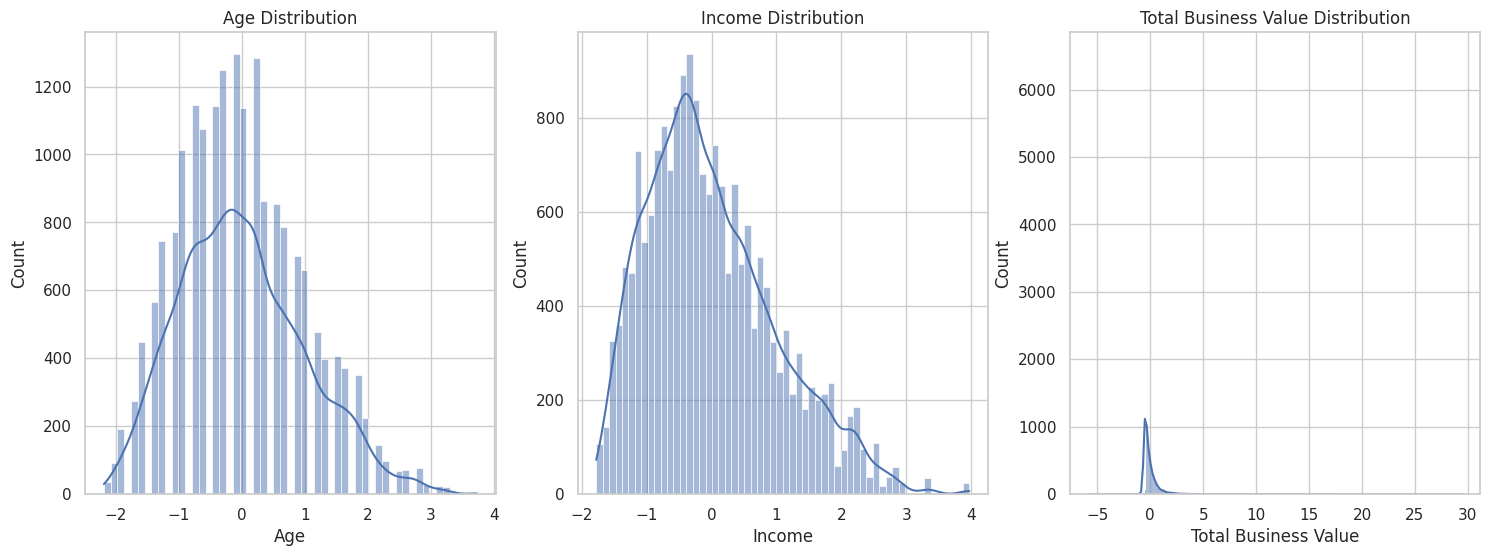

In [135]:
# Plot distributions of Age, Income, and Total Business Value
# Create a figure with three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Explanation:
# - plt.subplots(1, 3): Creates a figure with 1 row and 3 columns of subplots.
# - figsize=(18, 6): Sets the overall size of the figure to 18 inches wide and 6 inches tall.


# Plot the distribution of Age with a kernel density estimate (KDE) overlay
sns.histplot(Ola['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Explanation:
# - sns.histplot: Creates a histogram with a kernel density estimate (KDE) overlay.
# - Ola['Age']: Specifies the data for the plot.
# - kde=True: Adds a KDE overlay to the histogram.
# - ax=axes[0]: Specifies the subplot location.
# - set_title: Adds a title to the subplot.


# Plot the distribution of Income with a KDE overlay
sns.histplot(Ola['Income'], kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')

# Explanation:
# - sns.histplot: Creates a histogram with a kernel density estimate (KDE) overlay.
# - Ola['Income']: Specifies the data for the plot.
# - kde=True: Adds a KDE overlay to the histogram.
# - ax=axes[1]: Specifies the subplot location.
# - set_title: Adds a title to the subplot.

# Plot the distribution of Total Business Value with a KDE overlay
sns.histplot(Ola['Total Business Value'], kde=True, ax=axes[2])
axes[2].set_title('Total Business Value Distribution')

# Explanation:
# - sns.histplot: Creates a histogram with a kernel density estimate (KDE) overlay.
# - Ola['Total Business Value']: Specifies the data for the plot.
# - kde=True: Adds a KDE overlay to the histogram.
# - ax=axes[2]: Specifies the subplot location.
# - set_title: Adds a title to the subplot.

# Display the plots
plt.show()

# Explanation:
# - plt.show(): Displays the final figure with all the subplots.


-**Question**: How does Quarterly Rating vary across different drivers and time periods?

-**Answer**: As per the below visualization quarterly ratings remain mostly stable over time, with ratings generally falling between -1 and 1. Some quarters show more variation with outliers, indicating a few drivers performed exceptionally well or poorly. Overall, there is no clear upward or downward trend

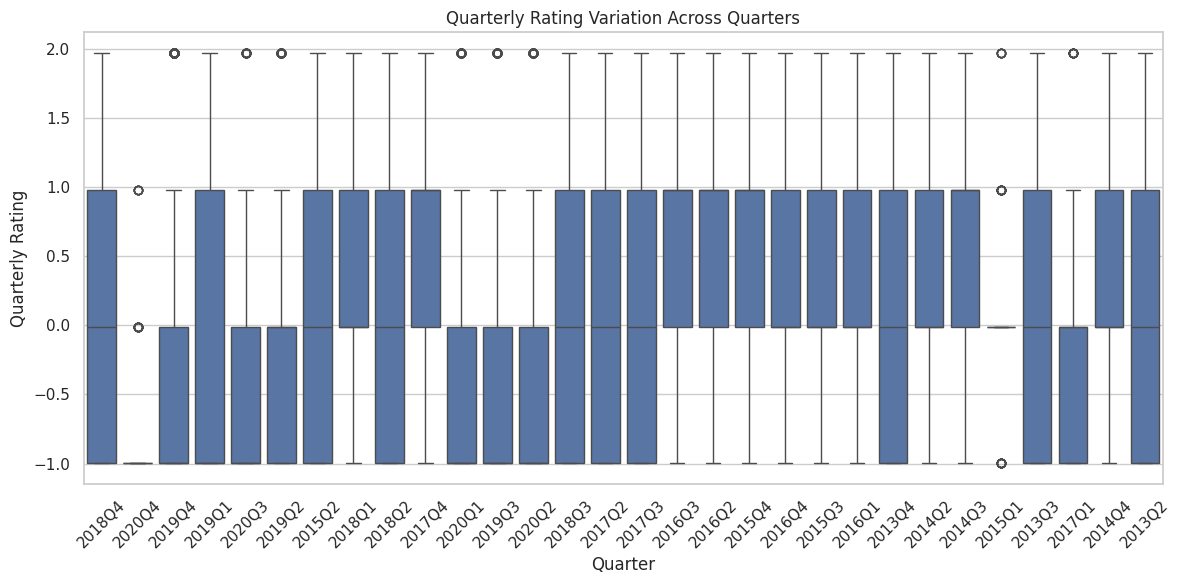

In [136]:
# Create 'Quarter' column from 'Dateofjoining'
# 'Quarter' will store the quarter in which each driver joined, using 'Dateofjoining'
Ola['Quarter'] = pd.PeriodIndex(Ola['Dateofjoining'], freq='Q')

# Explanation:
# - pd.PeriodIndex(Ola['Dateofjoining'], freq='Q'): Converts the 'Dateofjoining' column to a PeriodIndex with quarterly frequency.
# - This creates a new 'Quarter' column indicating the quarter in which each driver joined.

# Set plot size for clarity
# This sets the overall size of the plot for better readability
plt.figure(figsize=(12, 6))

# Explanation:
# - plt.figure(figsize=(12, 6)): Sets the size of the figure to 12 inches wide and 6 inches tall.


# Boxplot for Quarterly Rating across Quarters
# Create a boxplot to visualize the variation in Quarterly Rating across different quarters
sns.boxplot(data=Ola, x='Quarter', y='Quarterly Rating')

# Explanation:
# - sns.boxplot: Creates a boxplot to visualize the distribution of 'Quarterly Rating' across different 'Quarter'.
# - data=Ola, x='Quarter', y='Quarterly Rating': Specifies the data source and the x and y axes for the plot.


# Improve axis readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Quarter")  # Set a clear label for the x-axis
plt.ylabel("Quarterly Rating")  # Set a clear label for the y-axis
plt.title("Quarterly Rating Variation Across Quarters")  # Add a title to the plot

# Explanation:
# - plt.xticks(rotation=45): Rotates the x-axis labels by 45 degrees for better readability.
# - plt.xlabel, plt.ylabel: Sets the labels for the x and y axes.
# - plt.title: Adds a title to the plot.

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

# Display the plot
# Adjust layout for better fit and display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits nicely within the figure
plt.show()

# Explanation:
# - plt.tight_layout(): Adjusts the layout to ensure that all elements fit nicely within the figure.

-**Question**: Are there any trends or patterns in the monthly income or business value acquired?

-**Answer**:
- Yes, there are noticeable trends in the monthly income / business value Both Monthly Income and Business Value show high fluctuations in the earlier months (2013–2015).
- At the start, both Income and Business Value went up and down a lot. From 2016 onwards, Income started dropping, while Business Value stayed mostly steady but slightly fell.
- There’s a big spike around mid-2019 where both suddenly increased a lot before going down again.

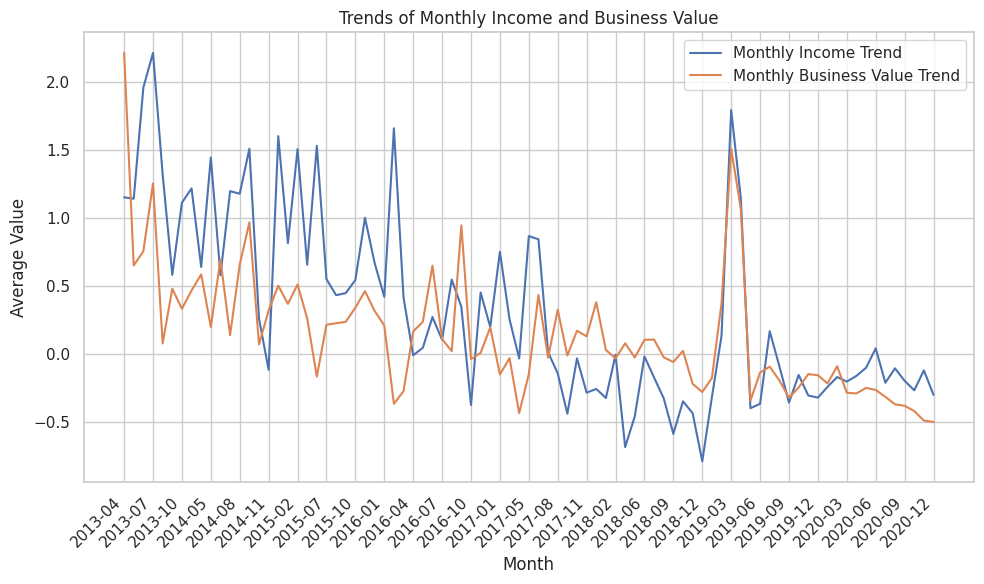

In [137]:
# Convert 'Dateofjoining' to datetime and extract month
# 'Month' will store the month and year each driver joined, using 'Dateofjoining'
Ola['Month'] = pd.to_datetime(Ola['Dateofjoining']).dt.to_period('M')

# Explanation:
# - pd.to_datetime: Converts the 'Dateofjoining' column to datetime format.
# - .dt.to_period('M'): Extracts the month and year from the datetime values, converting them to a period format (e.g., '2024-12').
# - This step creates a new 'Month' column indicating the month and year each driver joined.


# Calculate monthly trends
# Calculate the average monthly income for drivers
monthly_income_trend = Ola.groupby('Month')['Income'].mean()

# Explanation:
# - groupby('Month')['Income'].mean(): Groups the data by 'Month' and calculates the average income for each month.
# - This step creates a Series 'monthly_income_trend' containing the average monthly income values.

# Calculate the average monthly business value for drivers
monthly_business_value_trend = Ola.groupby('Month')['Total Business Value'].mean()

# Explanation:
# - groupby('Month')['Total Business Value'].mean(): Groups the data by 'Month' and calculates the average business value for each month.
# - This step creates a Series 'monthly_business_value_trend' containing the average monthly business value.

# Plot the trends
# Create a figure with a specific size for better readability
plt.figure(figsize=(10, 6))

# Explanation:
# - plt.figure(figsize=(10, 6)): Sets the size of the figure to 10 inches wide and 6 inches tall for better readability.

# Plot the monthly income trend
plt.plot(monthly_income_trend.index.astype(str), monthly_income_trend.values, label='Monthly Income Trend')

# Explanation:
# - plt.plot: Creates a line plot for the monthly income trend.
# - monthly_income_trend.index.astype(str): Converts the index (dates) to string format for the x-axis.
# - monthly_income_trend.values: Sets the y values for the plot.
# - label='Monthly Income Trend': Adds a label for the plot legend.

# Plot the monthly business value trend
plt.plot(monthly_business_value_trend.index.astype(str), monthly_business_value_trend.values, label='Monthly Business Value Trend')

# Explanation:
# - plt.plot: Creates a line plot for the monthly business value trend.
# - monthly_business_value_trend.index.astype(str): Converts the index (dates) to string format for the x-axis.
# - monthly_business_value_trend.values: Sets the y values for the plot.
# - label='Monthly Business Value Trend': Adds a label for the plot legend.

# Clean x-axis to avoid clutter
plt.xticks(monthly_income_trend.index[::3].astype(str), rotation=45, ha='right')

# Explanation:
# - plt.xticks: Sets the x-axis tick labels, showing every 3rd month label.
# - rotation=45: Rotates the x-axis labels by 45 degrees for better readability.
# - ha='right': Aligns the labels to the right.

# Add legend and labels
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Trends of Monthly Income and Business Value')

# Explanation:
# - plt.legend: Adds a legend to the plot.
# - plt.xlabel: Sets the label for the x-axis.
# - plt.ylabel: Sets the label for the y-axis.
# - plt.title: Adds a title to the plot.

# Display the plot
plt.tight_layout()
plt.show()

# Explanation:
# - plt.tight_layout: Adjusts the layout to ensure all elements fit nicely within the figure.

##**Missing Values Handling**

-**Question**: How should missing values in LastWorkingDate be treated, considering it indicates whether a driver has left?

**Answer**: To handle missing values in the LastWorkingDate column we can follow these steps:

**1. Assume Employment**: Treat missing values as an indication that the driver is still employed.

**2. Impute Placeholder**: Fill missing values with a future date like '9999-12-31' to signify ongoing employment.

**3. Create Attrition Indicator**: Add a column Attrition:

1 if the driver has left (LastWorkingDate is not '9999-12-31').

0 if still employed (LastWorkingDate is '9999-12-31').

In [138]:
# Create 'Attrition' column (1 if driver has left, 0 if still employed)
# 'Attrition' will store a binary value: 1 if the driver has left (LastWorkingDate is not '9999-12-31'), 0 if still employed
Ola['Attrition'] = (Ola['LastWorkingDate'] != '9999-12-31').astype(int)

# Verify the new 'Attrition' column
# Display the first few rows of 'LastWorkingDate' and 'Attrition' columns to verify the new 'Attrition' column
print(Ola[['LastWorkingDate', 'Attrition']].head())

  LastWorkingDate  Attrition
0      2020-07-29          1
1      2020-07-29          1
2      2019-11-03          1
3      2020-07-29          1
4      2020-07-29          1


##**Advanced Level Questions (60 points)**

**Correlation and Relationships:** (Below answers are based on the viusalizations which are described in the first part of the project)

-**Question**: Is there a correlation between Age and Income?

-**Answer**: From the visual analysis, it's clear that there's a notable correlation between age and income among the drivers. As drivers age, their income tends to increase, especially up until around the age of 40. After the age of 40, there's a slight decline in income levels. This could be attributed to several factors, such as health issues or shifts in job roles.

-**Question**: How do Education_Level and City affect Total Business Value?

-**Answer**: Higher education levels generally lead to higher business value. Cities like C12 and C13 show strong positive impacts, while cities like C6 and C8 show negative impacts.

-**Question**: Are drivers with higher Quarterly Rating more likely to stay longer?

-**Answer**: Yes, drivers with a higher quarterly rating (1) have an average tenure of approximately 83.16 months, suggesting they tend to stay with the company longer

##**8.Predictive Analysis(Optional) :**

-**Question**: Can we predict which drivers are likely to leave based on their demographic and performance attributes?

-**Answer**: Skipping this part as I have not performed any Machine learning technique

-**Question**: What machine learning techniques could be applied to predict driver attrition?
-**Answer**: Skipping this part as I have not performed any Machine learning technique

##**9. Recommendations**

- **Question**: Based on the analysis, what strategies can Ola implement to improve driver retention?
- **Answer**: These are some important startegies that Ola can implement to improve driver retention:
- Drivers should be given raises more often.
- Expectation from the job has to be asked from the drivers who joined recently as they tend to churn the most.
- Feedback must be taken from employees with consistently low ratings.
- Drivers can be assigned to different cities to check if their ratings can be increased.
- Ratings can be changed from Quarterly to monthly to better reflect progress

-**Question**: Are there specific demographic groups or performance metrics that require targeted interventions?

**Answer**: Yes, these are:
- Female drivers may need targeted recruitment or support.
- Older drivers (above 50) may need specialized programs.
- Drivers in low-performing cities (C3, C8) could benefit from location-specific strategies.
- Performance metrics for intervention:
- Drivers with consistently low ratings should receive mentorship and performance improvement programs.
- Low-income drivers require income-linked incentives to retain them.

##Actionable Insights & Recommendations (10 Points)##

**Provide actionable insights based on the analysis**:

-**Question**: Identify key factors influencing driver attrition

**Answer**: Key Factors Influencing Driver Attrition:

Gender Representation: 58% are male, 42% are female.

Age Group: Most drivers are aged 30-40. Younger (<25) and older (>50) drivers are underrepresented.

Education Levels: Majority hold 10+2 or graduate degrees.

City Distribution:

High engagement: Cities C20, C22.

Moderate engagement: Cities C10, C11, C12.

Low engagement: Cities C8, C9, C3.

Income: Median is ₹60,087, with significant variations causing dissatisfaction among low earners.

Attrition Peaks: High exits (17,500) in July 2020, possibly due to economic or policy factors.

Performance: Grades 2 and 1 are most common; Grades 4 and 5 are underrepresented.

Engagement: Low driver counts in certain cities (C3, C8) need targeted interventions.

Exit Rates: Seasonal changes, economic downturns, or policy shifts influence spikes.

Performance by Gender: Male drivers dominate high performance; female drivers show consistent mid-level performance.

Income vs. Retention: Higher attrition among low-income earners.

Geographical Disparity: Varies across cities, needing city-specific strategies.

Driver Ratings:

Many drivers are in Ratings 1 and 2.

Low-rated drivers more likely to exit, reflecting dissatisfaction or underperformance.

High-rated cities: C20, C22.

Low-rated cities: C8, C9, C3.

Business Value Impact:

Drops significantly when ratings fall below 2.

Lower ratings correlate with reduced revenues.

Monthly Rating Trends:

Peaks in January 2020, lower in mid-2019.

Gradual decline towards mid-2020.

-**Question**: Recommend strategies to improve driver retention

**Answer**: Drivers should be given regular raises to ensure satisfaction and reduce attrition.

Establish a formal feedback mechanism to understand expectations and
grievances, especially for new joiners and low-performing drivers.

Change rating evaluations from quarterly to monthly for better tracking and performance management.

Investigate high attrition months (e.g., July 2020) to identify policy or economic factors affecting exits.

Distribute workload evenly to prevent performance drops caused by driver fatigue.

Provide income-linked incentives or bonuses to motivate low-income drivers and reduce churn.

Encourage female driver participation through targeted recruitment campaigns and support initiatives.

Recognize and reward drivers achieving higher ratings to boost morale and retention.

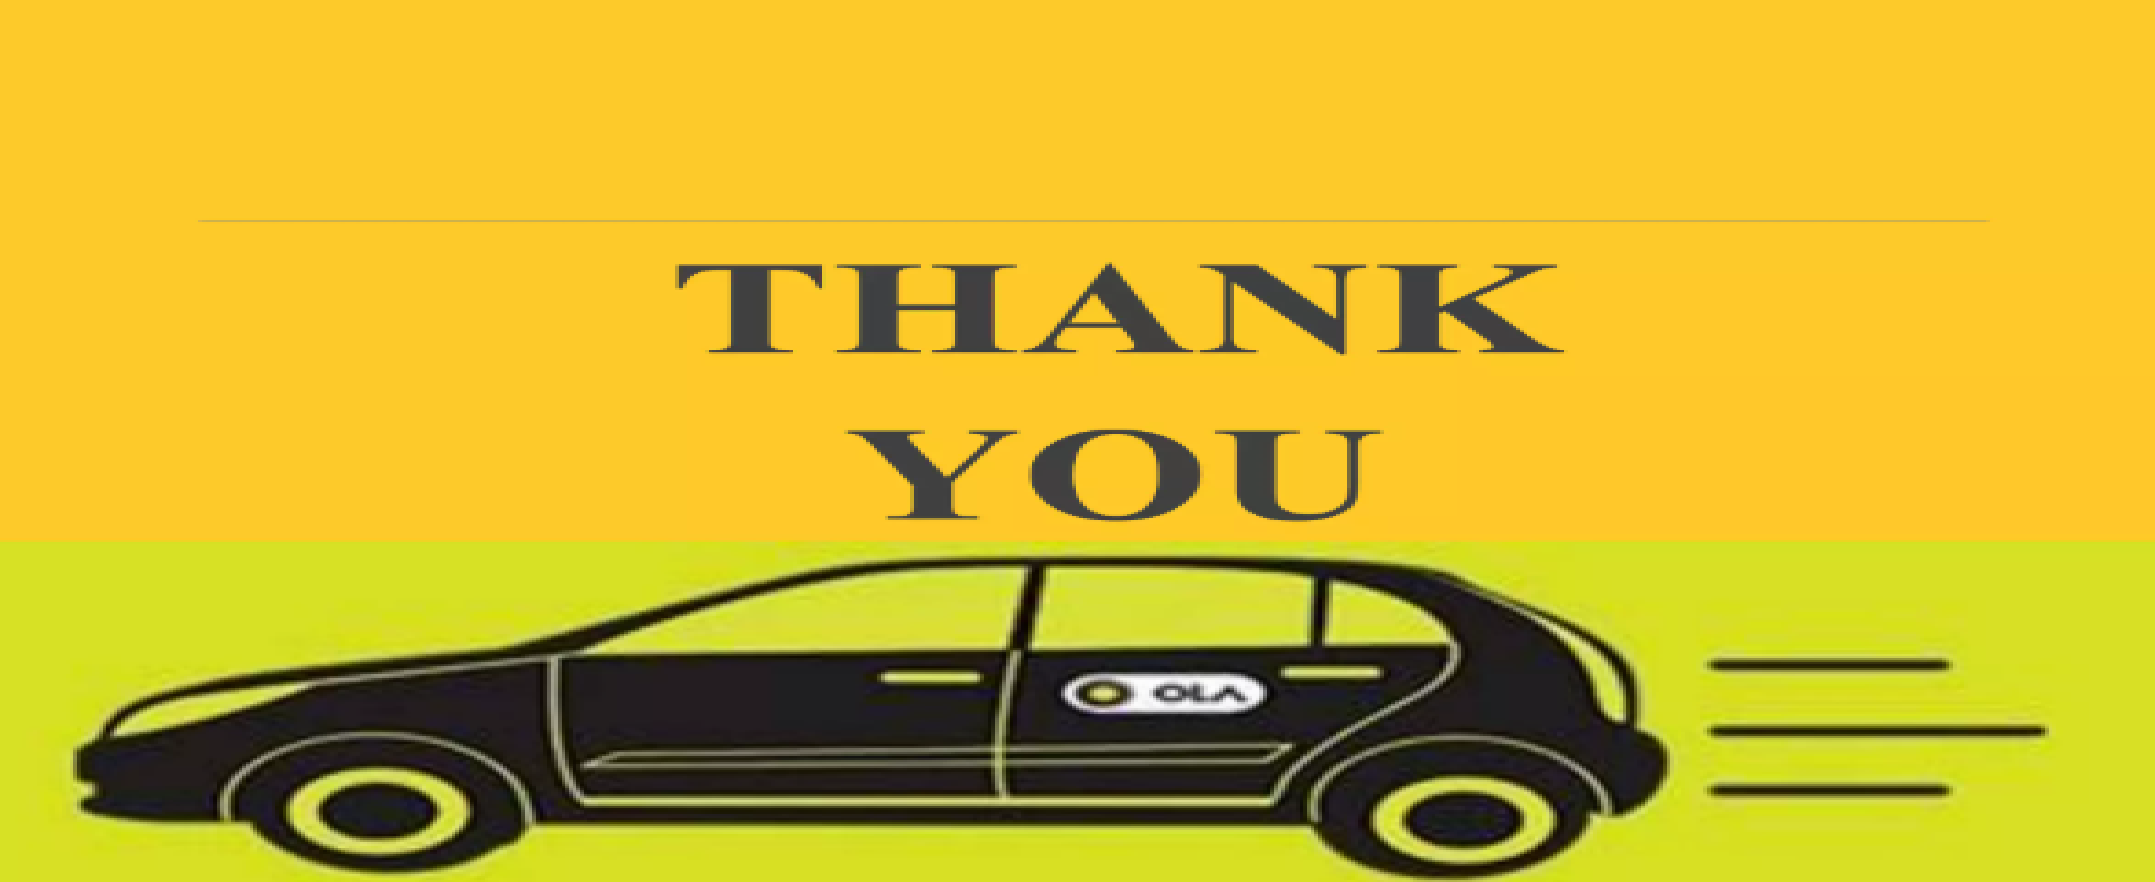